In [1]:
## To Do

# Should data be log normalised following a +1/ This will remove negative values after log norm.

In [2]:
writeOutput = False
writeOutput = True


In [3]:
import os
import scipy
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

from openpyxl import load_workbook

from scipy import stats as stats
from copy import copy as copy
from collections import Counter as cnt

from IPython.display import clear_output

import time

# Define/Import functions

In [4]:
from functions.masterdata import (master_data, read_Surf_Areas)
from functions.plotting import (
        plot_SA_Hist, 
        draw_probe_plot_2, 
        probe_GeoMean_Plots, 
        threshold_probes, 
        get_colour_mapping, 
        binding_density_plot
    )


# Import data from Nanostring initial dataset file.

In [5]:
# os.getcwd()

In [6]:
# read in paths from config file
configDict = {
    'rootDir': '',
    'initialDataPath' : '',
    'QCDataPath' : '',
    'labWorksheet01Path':'',
    'projectName':''
}

with open('config.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('#'):
            line = line.strip()
            fields = line.split(':')

            if fields[0].strip()=='initialDataPath':
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
            else:
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
## ToDo: Add checks to ensure that minimal fields have been populated. Raise errors or warnings

In [7]:
configDict

{'rootDir': '/Users/upton6/Documents/Nanostring/projects/Adams/',
 'initialDataPath': 'Initial Dataset.xlsx',
 'QCDataPath': 'Default_QC.xlsx',
 'labWorksheet01Path': 'Lab_Worksheet_P1001660017100A.txt',
 'projectName': 'Adams_Bray',
 'sampleInfoFile': 'sampleInfo_with_Wells.csv'}

In [8]:
dataPath = os.path.join(configDict['rootDir'],configDict['initialDataPath'])

masterData = master_data(dataPath)
dataExternal, dataLog1External, sampleInfoExternal = masterData.get_data()

print(masterData.probeClass)
print(masterData.probeClassDict)

nuclei = sampleInfoExternal.loc['AOI nuclei count']
surfArea = sampleInfoExternal.loc['AOI surface area']

dataLog1External, sampleInfoExternal = masterData.add_class_mean(masterData.dataLog1)

sampleInfo.shape
(31, 96)
data.shape
(79, 96)
CD8                  Endogenous
CD4                  Endogenous
HYB-NEG                Negative
GZMB                 Endogenous
Fibronectin          Endogenous
                        ...    
PARP                 Endogenous
p53                  Endogenous
Neurofibromin        Endogenous
GZMA                 Endogenous
Cleaved Caspase 9    Endogenous
Name: ProbeClass, Length: 79, dtype: object
{'Positive': 'A', 'Negative': 'B', 'Control': 'C', 'Endogenous': 'E'}
Positive Control count:	1, ['HYB-POS']
Nagative Control count:	4, ['HYB-NEG', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1']
Ig Control count:	3, ['Rb IgG', 'Ms IgG2a', 'Ms IgG1']
HK Control count:	3, ['S6', 'Histone H3', 'GAPDH']
Endogenous probe count:	71, ['CD8', 'CD4', 'GZMB', 'Fibronectin', 'Beta-2-microglobulin', 'PD-1', 'HLA-DR', 'CD3', 'CD56', 'CD11c', 'CTLA4', 'CD68', 'PanCk', 'SMA', 'CD20', 'PD-L1', 'CD45', 'Ki-67', 'CD25', 'ICOS', 'CD80', 'CD27', 'PD-L2', 'CD127', 'CD40', 'CD44', 'CD34'

In [9]:
sampleInfoExternal

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
Custom Segment Name,TMA_001_TNBC_240327a | 001 | Segment 1,TMA_001_TNBC_240327a | 002 | Segment 1,TMA_001_TNBC_240327a | 003 | Segment 1,TMA_001_TNBC_240327a | 004 | Segment 1,TMA_001_TNBC_240327a | 005 | Segment 1,TMA_001_TNBC_240327a | 006 | Segment 1,TMA_001_TNBC_240327a | 007 | Segment 1,TMA_001_TNBC_240327a | 008 | Segment 1,TMA_001_TNBC_240327a | 009 | Segment 1,TMA_001_TNBC_240327a | 010 | Segment 1,...,TMA_002_TNBC_240327 | 029 | Segment 1,TMA_002_TNBC_240327 | 030 | Segment 1,TMA_002_TNBC_240327 | 031 | Segment 1,TMA_002_TNBC_240327 | 032 | Segment 1,TMA_002_TNBC_240327 | 033 | Segment 1,TMA_002_TNBC_240327 | 034 | Segment 1,TMA_002_TNBC_240327 | 035 | Segment 1,TMA_002_TNBC_240327 | 036 | Segment 1,TMA_002_TNBC_240327 | 037 | Segment 1,TMA_002_TNBC_240327 | 038 | Segment 1
ROI,1c2ab061-972b-4227-95e9-5258d51c8e27,b465b231-4735-4036-96b5-51b75b387433,208ede3e-c633-4f23-aa77-98412fc80c33,795bf454-325f-40a8-9744-3e088eb71cec,f95ab5f3-aa46-458d-b657-fcf4da694848,c2b9cab2-4124-4e13-9f5e-c634210d5af5,d249163c-c8a6-46ba-bbb3-a39f0f0a93d1,77faae21-78b9-437c-8ce0-a93b8e340569,a33ff91d-2a1c-47c5-be42-c03423987723,853d0bb8-b16b-4567-8a75-c1127af5e57f,...,852af546-4f91-4845-a36c-c49449eb1ee6,3d1960fd-9a3d-4635-89cb-d6093cbf81de,2577a945-3961-427a-912d-10dc93135cac,18c6bdc1-6bc1-4053-9afb-3a10cb0dc60d,98dfd2d2-fc16-417d-901c-231d0e053254,47883f38-25d7-424f-8dc4-026f8ee02967,575d0d4c-a539-4ea9-a9c5-fa3df2aadfd8,17d4cd04-13ca-4edc-bdf5-85be0cbd264b,da0594eb-7ac1-454e-8fe1-18754987426f,7e12d16f-bb81-4172-aa51-7da692483286
ROI (Label),001,002,003,004,005,006,007,008,009,010,...,029,030,031,032,033,034,035,036,037,038
Segment,7936d809-ce05-4697-b1fd-f78adfeed555,0a7b8f61-078d-4877-9053-b53e5fd4614d,9e6564c7-7f87-44e1-8de7-7f264d9652e7,0c24d8bc-0bda-426f-b551-fb56e83f7c48,bb3efaed-92cb-44c8-bded-6c412faa3f28,aff1a8fa-0906-450a-8e6e-190b5c311c15,8897d9f1-29c0-4c8e-a85a-4d2317b9ee98,cfa789e4-02ec-4a0a-b079-809521dacd98,2e38b3b5-6108-4c67-bae4-1407b409ed5d,b428322e-fb26-4468-bc22-6880eb3d74d6,...,47ef0fac-b270-450b-a899-19afaf3a8c49,5fd178e2-2b3d-40b0-b9fb-b1158c7d3113,8ece77c9-a4cc-4926-9f90-f9d892cb6a51,528d80c9-6779-47c6-94ef-64c720aba698,1e4bf2f8-0088-4203-9827-f7d3fcb34146,5bbe2794-98f8-46df-b826-b7b77e7fc6a7,fa9c6ff6-c60a-4d6e-8065-9521674aeb0e,98b86df7-0282-422b-8758-24a7bdeec98d,990b2e46-dd95-435f-8a53-72cc2096df4d,54be0368-acf2-4d5c-809c-6a878f988fca
Segment (Name/ Label),Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,...,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1
ROI X Coordinate,15998.422852,17548.470703,22190.410156,21641.412109,28156.294922,29460.445312,34450.378906,35965.679688,14040.131836,22770.828125,...,16045.661133,18286.287109,15990.043945,9614.582031,11774.59082,15884,17818,10855,18335,10963
ROI Y Coordinate,47604.875,42694.140625,49197.96875,39689.90625,46551.570312,38989.851562,47247.910156,37720.617188,33845.117188,32324.011719,...,42486.558594,44687.472656,53921.28125,46081.296875,46319.253906,23071,22113,29783,38071,43305
Segment Tags,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,...,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 

In [10]:
# Find and correct zeros

for x in dataExternal.columns:
    # print(x)
    for y in dataExternal.index:
        # print(y)

        if (y == 'HYB-NEG'):
            dataExternal.loc[y,x] = dataExternal.loc[y,x] -1
        elif (y == 'HYB-POS'):
            dataExternal.loc[y,x] = dataExternal.loc[y,x] -1
        else:
            if (dataExternal.loc[y,x] == 1):
                print(x,y)
                dataExternal.loc[y,x] = 0.0

        # print(dataExternal.loc[y,x])


# values.flatten():
#     if x == 1:
#         print(x)

TMA_001_TNBC_240327a_001_Segment 1 CD27
TMA_001_TNBC_240327a_001_Segment 1 PLCG1
TMA_001_TNBC_240327a_001_Segment 1 Phospho-Tuberin (T1462)
TMA_001_TNBC_240327a_001_Segment 1 Phospho-GSK3B (S9)
TMA_001_TNBC_240327a_002_Segment 1 Rb IgG
TMA_001_TNBC_240327a_002_Segment 1 CD56
TMA_001_TNBC_240327a_002_Segment 1 Ms IgG1
TMA_001_TNBC_240327a_002_Segment 1 PD-L1
TMA_001_TNBC_240327a_002_Segment 1 ICOS
TMA_001_TNBC_240327a_002_Segment 1 CD80
TMA_001_TNBC_240327a_002_Segment 1 CD27
TMA_001_TNBC_240327a_002_Segment 1 CD40
TMA_001_TNBC_240327a_002_Segment 1 CD14
TMA_001_TNBC_240327a_002_Segment 1 CD66b
TMA_001_TNBC_240327a_002_Segment 1 Her2
TMA_001_TNBC_240327a_002_Segment 1 NY-ESO-1
TMA_001_TNBC_240327a_002_Segment 1 PR
TMA_001_TNBC_240327a_002_Segment 1 MART1
TMA_001_TNBC_240327a_002_Segment 1 4-1BB
TMA_001_TNBC_240327a_002_Segment 1 GITR
TMA_001_TNBC_240327a_002_Segment 1 B7-H3
TMA_001_TNBC_240327a_002_Segment 1 LAG3
TMA_001_TNBC_240327a_002_Segment 1 ARG1
TMA_001_TNBC_240327a_002_Segment 1

In [11]:
# ERCC corect data

In [12]:
# Compare ercc corected initial data to QC data

# Infer the sample locations on the processing plates

In [13]:
sampleInfoExternal.loc['AOI surface area'] = [round(x) for x in sampleInfoExternal.loc['AOI surface area']]
print(sampleInfoExternal.loc['AOI surface area'])


TMA_001_TNBC_240327a_001_Segment 1     8341
TMA_001_TNBC_240327a_002_Segment 1    25360
TMA_001_TNBC_240327a_003_Segment 1     5034
TMA_001_TNBC_240327a_004_Segment 1    10257
TMA_001_TNBC_240327a_005_Segment 1    13383
                                      ...  
TMA_002_TNBC_240327_034_Segment 1      8883
TMA_002_TNBC_240327_035_Segment 1     10835
TMA_002_TNBC_240327_036_Segment 1      5073
TMA_002_TNBC_240327_037_Segment 1      5366
TMA_002_TNBC_240327_038_Segment 1      5531
Name: AOI surface area, Length: 96, dtype: object


#### Import the worksheet paths from the config file

In [14]:
wsPaths = [configDict[x] for x in configDict.keys() if x.startswith('labWorksheet')]

indexList = list(map(chr, range(ord('A'), ord('H')+1)))
columnList = [str(n).zfill(2) for n in range(1,13)]

validWells = []
for i in indexList:
    for c in columnList:
        validWells.append(i+c)
# print(len(validWells))

wsList = []
wellDFs = [] # Set up empty dataframe to be populated with sample names
for x in wsPaths:
    wsList.append(read_Surf_Areas(os.path.join(configDict['rootDir'],x), indexList, columnList))
    wellDFs.append(pd.DataFrame(data='', index = indexList, columns = columnList))
    

In [15]:
wsList[0]

,01,02,03,04,05,06,07,08,09,10,11,12
A,8341,25360,5034,10257,13383,5161,19799,14099,9946,4358,8686,13714
B,9584,14648,6526,10426,7477,18650,5299,8046,13367,16421,15621,22847
C,7516,13808,4598,7463,17116,13583,5276,7969,10646,4143,9103,6851
D,6457,14451,8043,6527,7646,3937,10516,17827,5917,6629,6548,10292
E,7050,28162,13101,14465,7012,2450,6744,18600,6820,4124,13057,12120
F,5981,3171,29682,16482,11620,16249,18705,9100,12031,9316,9206,13449
G,13342,4692,7048,9137,10248,5199,4522,9841,5462,43356,26384,14839
H,32763,27850,20045,18220,18991,13875,13315,8883,10835,5073,5366,5531


In [16]:
ws1Area = list(wsList[0].values.flatten())
allArea = ws1Area.copy()
print(allArea)

[8341, 25360, 5034, 10257, 13383, 5161, 19799, 14099, 9946, 4358, 8686, 13714, 9584, 14648, 6526, 10426, 7477, 18650, 5299, 8046, 13367, 16421, 15621, 22847, 7516, 13808, 4598, 7463, 17116, 13583, 5276, 7969, 10646, 4143, 9103, 6851, 6457, 14451, 8043, 6527, 7646, 3937, 10516, 17827, 5917, 6629, 6548, 10292, 7050, 28162, 13101, 14465, 7012, 2450, 6744, 18600, 6820, 4124, 13057, 12120, 5981, 3171, 29682, 16482, 11620, 16249, 18705, 9100, 12031, 9316, 9206, 13449, 13342, 4692, 7048, 9137, 10248, 5199, 4522, 9841, 5462, 43356, 26384, 14839, 32763, 27850, 20045, 18220, 18991, 13875, 13315, 8883, 10835, 5073, 5366, 5531]


In [17]:
collect = cnt(allArea)

unique = [int(k) for k in collect.keys() if collect[k] ==1]
nonUnique = [int(k) for k in collect.keys() if collect[k] !=1]

print(len(unique))
print(len(nonUnique))


96
0


In [18]:
plates = (wsList[0],)

SAWellDict = {}
SAPlateDict = {}
AOItoWellDict = {}
AOItoPlateDict = {}

PlateWellDict = {1:[],2:[]} 
for i, plate in enumerate(wsList):
    for col in plate.columns:
        for row in plate.index:
            val = int(plate.loc[row,col])
            if val in unique:
                print(row + col + ' : ' + str(val))
                SAWellDict[val] = row + col
                
                possibleMatches = sampleInfoExternal.loc[:,sampleInfoExternal.T['AOI surface area'] == val].columns 
                if len (possibleMatches == 1):
                    wellDFs[i].loc[row,col] = possibleMatches[0]
                    AOItoWellDict[possibleMatches[0]] = row + col
                else:
                    print(possibleMatches)
                
                if val in ws1Area:
                    SAPlateDict[val] = 1
                    PlateWellDict[1].append(row+col)
                    AOItoPlateDict[possibleMatches[0]] = 1
                elif val in ws2Area:
                    SAPlateDict[val] = 2
                    PlateWellDict[2].append(row+col)
                    AOItoPlateDict[possibleMatches[0]] = 2
                    

A01 : 8341
B01 : 9584
C01 : 7516
D01 : 6457
E01 : 7050
F01 : 5981
G01 : 13342
H01 : 32763
A02 : 25360
B02 : 14648
C02 : 13808
D02 : 14451
E02 : 28162
F02 : 3171
G02 : 4692
H02 : 27850
A03 : 5034
B03 : 6526
C03 : 4598
D03 : 8043
E03 : 13101
F03 : 29682
G03 : 7048
H03 : 20045
A04 : 10257
B04 : 10426
C04 : 7463
D04 : 6527
E04 : 14465
F04 : 16482
G04 : 9137
H04 : 18220
A05 : 13383
B05 : 7477
C05 : 17116
D05 : 7646
E05 : 7012
F05 : 11620
G05 : 10248
H05 : 18991
A06 : 5161
B06 : 18650
C06 : 13583
D06 : 3937
E06 : 2450
F06 : 16249
G06 : 5199
H06 : 13875
A07 : 19799
B07 : 5299
C07 : 5276
D07 : 10516
E07 : 6744
F07 : 18705
G07 : 4522
H07 : 13315
A08 : 14099
B08 : 8046
C08 : 7969
D08 : 17827
E08 : 18600
F08 : 9100
G08 : 9841
H08 : 8883
A09 : 9946
B09 : 13367
C09 : 10646
D09 : 5917
E09 : 6820
F09 : 12031
G09 : 5462
H09 : 10835
A10 : 4358
B10 : 16421
C10 : 4143
D10 : 6629
E10 : 4124
F10 : 9316
G10 : 43356
H10 : 5073
A11 : 8686
B11 : 15621
C11 : 9103
D11 : 6548
E11 : 13057
F11 : 9206
G11 : 26384
H1

In [19]:
wellDFs[0]

,01,02,03,04,05,06,07,08,09,10,11,12
A,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,TMA_001_TNBC_240327a_011_Segment 1,TMA_001_TNBC_240327a_012_Segment 1
B,TMA_001_TNBC_240327a_013_Segment 1,TMA_001_TNBC_240327a_014_Segment 1,TMA_001_TNBC_240327a_015_Segment 1,TMA_001_TNBC_240327a_016_Segment 1,TMA_001_TNBC_240327a_017_Segment 1,TMA_001_TNBC_240327a_018_Segment 1,TMA_001_TNBC_240327a_019_Segment 1,TMA_001_TNBC_240327a_020_Segment 1,TMA_001_TNBC_240327a_021_Segment 1,TMA_001_TNBC_240327a_022_Segment 1,TMA_001_TNBC_240327a_023_Segment 1,TMA_001_TNBC_240327a_024_Segment 1
C,TMA_001_TNBC_240327a_025_Segment 1,TMA_001_TNBC_240327a_026_Segment 1,TMA_001_TNBC_240327a_027_Segment 1,TMA_001_TNBC_240327a_028_Segment 1,TMA_001_TNBC_240327a_029_Segment 1,TMA_001_TNBC_240327a_030_Segment 1,TMA_001_TNBC_240327a_031_Segment 1,TMA_001_TNBC_240327a_032_Segment 1,TMA_001_TNBC_240327a_033_Segment 1,TMA_001_TNBC_240327a_034_Segment 1,TMA_001_TNBC_240327a_035_Segment 1,TMA_001_TNBC_240327a_036_Segment 1
D,TMA_001_TNBC_240327a_037_Segment 1,TMA_001_TNBC_240327a_038_Segment 1,TMA_001_TNBC_240327a_039_Segment 1,TMA_001_TNBC_240327a_040_Segment 1,TMA_001_TNBC_240327a_041_Segment 1,TMA_001_TNBC_240327a_042_Segment 1,TMA_001_TNBC_240327a_043_Segment 1,TMA_001_TNBC_240327a_044_Segment 1,TMA_001_TNBC_240327a_045_Segment 1,TMA_001_TNBC_240327a_046_Segment 1,TMA_001_TNBC_240327a_047_Segment 1,TMA_001_TNBC_240327a_048_Segment 1
E,TMA_001_TNBC_240327a_049_Segment 1,TMA_001_TNBC_240327a_050_Segment 1,TMA_001_TNBC_240327a_051_Segment 1,TMA_001_TNBC_240327a_052_Segment 1,TMA_001_TNBC_240327a_053_Segment 1,TMA_001_TNBC_240327a_054_Segment 1,TMA_001_TNBC_240327a_055_Segment 1,TMA_001_TNBC_240327a_056_Segment 1,TMA_001_TNBC_240327a_057_Segment 1,TMA_001_TNBC_240327a_058_Segment 1,TMA_002_TNBC_240327_001_Segment 1,TMA_002_TNBC_240327_002_Segment 1
F,TMA_002_TNBC_240327_003_Segment 1,TMA_002_TNBC_240327_004_Segment 1,TMA_002_TNBC_240327_005_Segment 1,TMA_002_TNBC_240327_006_Segment 1,TMA_002_TNBC_240327_007_Segment 1,TMA_002_TNBC_240327_008_Segment 1,TMA_002_TNBC_240327_009_Segment 1,TMA_002_TNBC_240327_010_Segment 1,TMA_002_TNBC_240327_011_Segment 1,TMA_002_TNBC_240327_012_Segment 1,TMA_002_TNBC_240327_013_Segment 1,TMA_002_TNBC_240327_014_Segment 1
G,TMA_002_TNBC_240327_015_Segment 1,TMA_002_TNBC_240327_016_Segment 1,TMA_002_TNBC_240327_017_Segment 1,TMA_002_TNBC_240327_018_Segment 1,TMA_002_TNBC_240327_019_Segment 1,TMA_002_TNBC_240327_020_Segment 1,TMA_002_TNBC_240327_021_Segment 1,TMA_002_TNBC_240327_022_Segment 1,TMA_002_TNBC_240327_023_Segment 1,TMA_002_TNBC_240327_024_Segment 1,TMA_002_TNBC_240327_025_Segment 1,TMA_002_TNBC_240327_026_Segment 1
H,TMA_002_TNBC_240327_027_Segment 1,TMA_002_TNBC_240327_028_Segment 1,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1


In [20]:
# SAWellDict

In [21]:
# AOItoWellDict

In [22]:
toLocate = []
for smpl in sampleInfoExternal.columns:
    if not (smpl in AOItoWellDict.keys()):
        prev = smpl.split('_')[-2]
        prv2 =  "{:03d}".format(int(prev)-2)
        prv =  "{:03d}".format(int(prev)-1)
        nxt =  "{:03d}".format(int(prev)+1)
        nxt2 =  "{:03d}".format(int(prev)+2)
        prv2 = '_'.join(smpl.split('_')[:-2]) + '_' + prv2
        prv = '_'.join(smpl.split('_')[:-2]) + '_' + prv
        nxt = '_'.join(smpl.split('_')[:-2]) + '_' + nxt
        nxt2 = '_'.join(smpl.split('_')[:-2]) + '_' + nxt2
        prvSamples = [x for x in sampleInfoExternal.columns if ((prv in x) or (prv2 in x))]
        nxtSamples = [x for x in sampleInfoExternal.columns if ((nxt in x) or (nxt2 in x))]
        toLocate.append([smpl, prvSamples, nxtSamples])
        

print(toLocate)

print(len(toLocate))

[]
0


# Manually enter remaining sample locations on processing plates

In [23]:
# Print plate hints for each well
# Sort samples better for display?
# Update dataframes also
# Repeat for incorrect/incomplete entries

# Confirm entries with y/n input

for t in toLocate:
    print()
    print(t[0])
    
    ## Confirm that well has not been located already in a prior run
    try:
        hasPlate = AOItoPlateDict[t[0]]
    except KeyError:
        hasPlate = False
        
    try:
        hasWell = AOItoWellDict[t[0]]
    except KeyError:
        hasWell = False

    if (hasPlate or hasWell):
        print('has entry')
        time.sleep(1)
        continue

    print('previous:')
    for p in sorted(t[1]):
        try:
            print(p + '\t: ' + str(AOItoPlateDict[p]) + ' ' + AOItoWellDict[p])
        except KeyError:
            print(p + '\t: not in dict')
            
    print('next:')
    for n in sorted(t[2]):
        try:
            print(n + '\t: ' + str(AOItoPlateDict[n]) + ' ' + AOItoWellDict[n])
        except KeyError:
            print(n + '\t: not in dict')
    
    plate = int(input('enter desired plate for this sample'))
    well = input('enter desired well for this sample')
    clear_output(wait=True)
    
    print('you entered:')
    
    print(plate)
    print(well)
    if well in validWells:
        print('Well is valid')
        if (well in PlateWellDict[plate]):
            print('well already has entry')
            time.sleep(2)
        else:
            PlateWellDict[plate].append(well)
            AOItoWellDict[t[0]] = well
            AOItoPlateDict[t[0]] = plate
            
            ##### Also add to dataframes
            wellDFs[plate-1].loc[well[0],well[1:]] = t[0]
            # if plate == 1:
            #     wellDF1.loc[well[0],well[1:]] = t[0]
            # elif plate == 2:
            #     wellDF2.loc[well[0],well[1:]] = t[0]

    else:
        print('invalid well entered')
        pass
        
# ToDo: Confirm that all entries appear correct (Surface Areas match)

In [24]:
wellDFs[0]

,01,02,03,04,05,06,07,08,09,10,11,12
A,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,TMA_001_TNBC_240327a_011_Segment 1,TMA_001_TNBC_240327a_012_Segment 1
B,TMA_001_TNBC_240327a_013_Segment 1,TMA_001_TNBC_240327a_014_Segment 1,TMA_001_TNBC_240327a_015_Segment 1,TMA_001_TNBC_240327a_016_Segment 1,TMA_001_TNBC_240327a_017_Segment 1,TMA_001_TNBC_240327a_018_Segment 1,TMA_001_TNBC_240327a_019_Segment 1,TMA_001_TNBC_240327a_020_Segment 1,TMA_001_TNBC_240327a_021_Segment 1,TMA_001_TNBC_240327a_022_Segment 1,TMA_001_TNBC_240327a_023_Segment 1,TMA_001_TNBC_240327a_024_Segment 1
C,TMA_001_TNBC_240327a_025_Segment 1,TMA_001_TNBC_240327a_026_Segment 1,TMA_001_TNBC_240327a_027_Segment 1,TMA_001_TNBC_240327a_028_Segment 1,TMA_001_TNBC_240327a_029_Segment 1,TMA_001_TNBC_240327a_030_Segment 1,TMA_001_TNBC_240327a_031_Segment 1,TMA_001_TNBC_240327a_032_Segment 1,TMA_001_TNBC_240327a_033_Segment 1,TMA_001_TNBC_240327a_034_Segment 1,TMA_001_TNBC_240327a_035_Segment 1,TMA_001_TNBC_240327a_036_Segment 1
D,TMA_001_TNBC_240327a_037_Segment 1,TMA_001_TNBC_240327a_038_Segment 1,TMA_001_TNBC_240327a_039_Segment 1,TMA_001_TNBC_240327a_040_Segment 1,TMA_001_TNBC_240327a_041_Segment 1,TMA_001_TNBC_240327a_042_Segment 1,TMA_001_TNBC_240327a_043_Segment 1,TMA_001_TNBC_240327a_044_Segment 1,TMA_001_TNBC_240327a_045_Segment 1,TMA_001_TNBC_240327a_046_Segment 1,TMA_001_TNBC_240327a_047_Segment 1,TMA_001_TNBC_240327a_048_Segment 1
E,TMA_001_TNBC_240327a_049_Segment 1,TMA_001_TNBC_240327a_050_Segment 1,TMA_001_TNBC_240327a_051_Segment 1,TMA_001_TNBC_240327a_052_Segment 1,TMA_001_TNBC_240327a_053_Segment 1,TMA_001_TNBC_240327a_054_Segment 1,TMA_001_TNBC_240327a_055_Segment 1,TMA_001_TNBC_240327a_056_Segment 1,TMA_001_TNBC_240327a_057_Segment 1,TMA_001_TNBC_240327a_058_Segment 1,TMA_002_TNBC_240327_001_Segment 1,TMA_002_TNBC_240327_002_Segment 1
F,TMA_002_TNBC_240327_003_Segment 1,TMA_002_TNBC_240327_004_Segment 1,TMA_002_TNBC_240327_005_Segment 1,TMA_002_TNBC_240327_006_Segment 1,TMA_002_TNBC_240327_007_Segment 1,TMA_002_TNBC_240327_008_Segment 1,TMA_002_TNBC_240327_009_Segment 1,TMA_002_TNBC_240327_010_Segment 1,TMA_002_TNBC_240327_011_Segment 1,TMA_002_TNBC_240327_012_Segment 1,TMA_002_TNBC_240327_013_Segment 1,TMA_002_TNBC_240327_014_Segment 1
G,TMA_002_TNBC_240327_015_Segment 1,TMA_002_TNBC_240327_016_Segment 1,TMA_002_TNBC_240327_017_Segment 1,TMA_002_TNBC_240327_018_Segment 1,TMA_002_TNBC_240327_019_Segment 1,TMA_002_TNBC_240327_020_Segment 1,TMA_002_TNBC_240327_021_Segment 1,TMA_002_TNBC_240327_022_Segment 1,TMA_002_TNBC_240327_023_Segment 1,TMA_002_TNBC_240327_024_Segment 1,TMA_002_TNBC_240327_025_Segment 1,TMA_002_TNBC_240327_026_Segment 1
H,TMA_002_TNBC_240327_027_Segment 1,TMA_002_TNBC_240327_028_Segment 1,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1


In [25]:
## Statements for debugging and development
# len(AOItoWellDict)
# len(AOItoPlateDict)
# len(PlateWellDict[1])
# len(set(PlateWellDict[2]))
# PlateWellDict[1]

## Uncomment to overwrite or update mappings files

# wellDF1.to_csv(os.path.join(dataPath[:dataPath.rfind('/')],'AOI_Well_Mappings_Plate1.csv'))
# wellDF2.to_csv(os.path.join(dataPath[:dataPath.rfind('/')],'AOI_Well_Mappings_Plate2.csv'))



In [26]:
# sampleInfoExternal

In [27]:
AOIWell = pd.DataFrame(data = AOItoWellDict.values(), columns = ['Well'], index = AOItoWellDict.keys()).T
# print(AOIWell)
AOIRow = pd.DataFrame(data = [x[0] for x in AOItoWellDict.values()], columns = ['Row'], index = AOItoWellDict.keys()).T
# print(AOIRow)
AOICol = pd.DataFrame(data = [x[1:] for x in AOItoWellDict.values()], columns = ['Col'], index = AOItoWellDict.keys()).T
# print(AOICol)
AOIPlate = pd.DataFrame(data = AOItoPlateDict.values(), columns = ['Plate'], index = AOItoPlateDict.keys()).T
# print(AOIPlate)
plateInfo = pd.concat([AOIWell, AOIRow, AOICol, AOIPlate])
# print(plateInfo)
sampleInfo = pd.concat([sampleInfoExternal, plateInfo])

In [28]:
sampleInfo

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
Custom Segment Name,TMA_001_TNBC_240327a | 001 | Segment 1,TMA_001_TNBC_240327a | 002 | Segment 1,TMA_001_TNBC_240327a | 003 | Segment 1,TMA_001_TNBC_240327a | 004 | Segment 1,TMA_001_TNBC_240327a | 005 | Segment 1,TMA_001_TNBC_240327a | 006 | Segment 1,TMA_001_TNBC_240327a | 007 | Segment 1,TMA_001_TNBC_240327a | 008 | Segment 1,TMA_001_TNBC_240327a | 009 | Segment 1,TMA_001_TNBC_240327a | 010 | Segment 1,...,TMA_002_TNBC_240327 | 029 | Segment 1,TMA_002_TNBC_240327 | 030 | Segment 1,TMA_002_TNBC_240327 | 031 | Segment 1,TMA_002_TNBC_240327 | 032 | Segment 1,TMA_002_TNBC_240327 | 033 | Segment 1,TMA_002_TNBC_240327 | 034 | Segment 1,TMA_002_TNBC_240327 | 035 | Segment 1,TMA_002_TNBC_240327 | 036 | Segment 1,TMA_002_TNBC_240327 | 037 | Segment 1,TMA_002_TNBC_240327 | 038 | Segment 1
ROI,1c2ab061-972b-4227-95e9-5258d51c8e27,b465b231-4735-4036-96b5-51b75b387433,208ede3e-c633-4f23-aa77-98412fc80c33,795bf454-325f-40a8-9744-3e088eb71cec,f95ab5f3-aa46-458d-b657-fcf4da694848,c2b9cab2-4124-4e13-9f5e-c634210d5af5,d249163c-c8a6-46ba-bbb3-a39f0f0a93d1,77faae21-78b9-437c-8ce0-a93b8e340569,a33ff91d-2a1c-47c5-be42-c03423987723,853d0bb8-b16b-4567-8a75-c1127af5e57f,...,852af546-4f91-4845-a36c-c49449eb1ee6,3d1960fd-9a3d-4635-89cb-d6093cbf81de,2577a945-3961-427a-912d-10dc93135cac,18c6bdc1-6bc1-4053-9afb-3a10cb0dc60d,98dfd2d2-fc16-417d-901c-231d0e053254,47883f38-25d7-424f-8dc4-026f8ee02967,575d0d4c-a539-4ea9-a9c5-fa3df2aadfd8,17d4cd04-13ca-4edc-bdf5-85be0cbd264b,da0594eb-7ac1-454e-8fe1-18754987426f,7e12d16f-bb81-4172-aa51-7da692483286
ROI (Label),001,002,003,004,005,006,007,008,009,010,...,029,030,031,032,033,034,035,036,037,038
Segment,7936d809-ce05-4697-b1fd-f78adfeed555,0a7b8f61-078d-4877-9053-b53e5fd4614d,9e6564c7-7f87-44e1-8de7-7f264d9652e7,0c24d8bc-0bda-426f-b551-fb56e83f7c48,bb3efaed-92cb-44c8-bded-6c412faa3f28,aff1a8fa-0906-450a-8e6e-190b5c311c15,8897d9f1-29c0-4c8e-a85a-4d2317b9ee98,cfa789e4-02ec-4a0a-b079-809521dacd98,2e38b3b5-6108-4c67-bae4-1407b409ed5d,b428322e-fb26-4468-bc22-6880eb3d74d6,...,47ef0fac-b270-450b-a899-19afaf3a8c49,5fd178e2-2b3d-40b0-b9fb-b1158c7d3113,8ece77c9-a4cc-4926-9f90-f9d892cb6a51,528d80c9-6779-47c6-94ef-64c720aba698,1e4bf2f8-0088-4203-9827-f7d3fcb34146,5bbe2794-98f8-46df-b826-b7b77e7fc6a7,fa9c6ff6-c60a-4d6e-8065-9521674aeb0e,98b86df7-0282-422b-8758-24a7bdeec98d,990b2e46-dd95-435f-8a53-72cc2096df4d,54be0368-acf2-4d5c-809c-6a878f988fca
Segment (Name/ Label),Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,...,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1
ROI X Coordinate,15998.422852,17548.470703,22190.410156,21641.412109,28156.294922,29460.445312,34450.378906,35965.679688,14040.131836,22770.828125,...,16045.661133,18286.287109,15990.043945,9614.582031,11774.59082,15884,17818,10855,18335,10963
ROI Y Coordinate,47604.875,42694.140625,49197.96875,39689.90625,46551.570312,38989.851562,47247.910156,37720.617188,33845.117188,32324.011719,...,42486.558594,44687.472656,53921.28125,46081.296875,46319.253906,23071,22113,29783,38071,43305
Segment Tags,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,...,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 1,Segment 

In [29]:
sampleInfoExternal = sampleInfo

In [30]:
# ToDo: Make this interactive to ask whether to write or not?
# ToDo: Update master sample info to include plate and well info

In [31]:
## Write sample info with well data included to file:

# writeOutput = True
if writeOutput:
    sampleInfo.to_csv(os.path.join(dataPath[:dataPath.rfind('/')],'sampleInfo_with_Wells.csv'))
# writeOutput= False

# ### Use the following to manually update plate/well order

# # sampleInfoExternal.to_csv(os.path.join(dataPath[:dataPath.rfind("/")],'sampleInfo.csv'))

# ### Fix plate order in Excel then reverse commenting

# # sampleInfoExternal = pd.read_csv(os.path.join(dataPath[:dataPath.rfind("/")],'sampleInfo.csv'),index_col=0)
# sampleInfoExternal = pd.read_csv(os.path.join(dataPath[:dataPath.rfind("/")],'sampleInfo_with_Wells.csv'),index_col=0)



# Basic QC and data overview plots

choose factors of interest

### Choose factors of interest for data visualisation

Min SA
2449.564214
Max SA
43355.655546


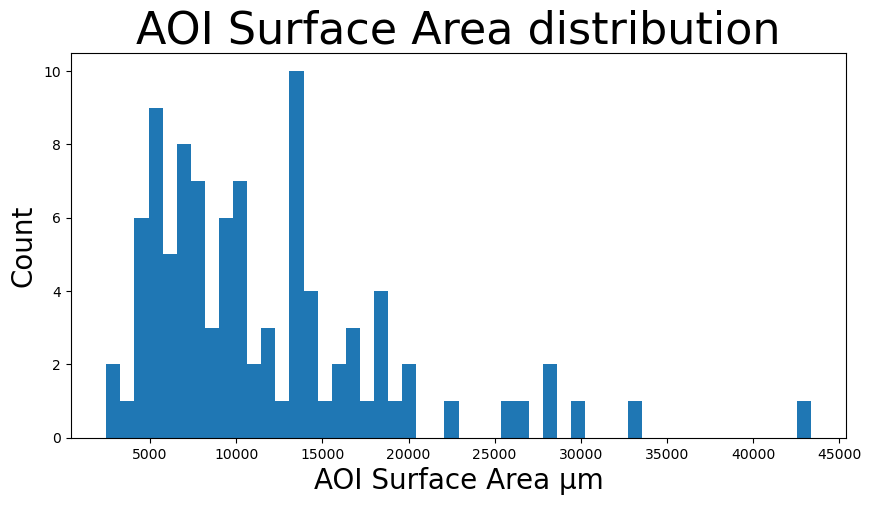

In [32]:
# View distribution of AOI surface areas
# Add colouring for different AOI types

SAHist = plot_SA_Hist(surfArea)


In [33]:
input("Press Enter to continue and choose factors of interest via the checkboxes generated in the next cell.")

Press Enter to continue and choose factors of interest via the checkboxes generated in the next cell. 


''

<i>INFO: The input cell does not advance to the next cell. Run the first cell below to generate the checkboxes, then select checkboxes and run the second cell below to read the selected checkboxes. Re-running the first cell below will clear selections and generate empty checkboxes.</i>

In [34]:
selected_data = []

data = list(sampleInfoExternal.index)
checkboxes = [widgets.Checkbox(value=False, description=label) for label in data]
output = widgets.VBox(children=checkboxes)
display(output)

In [35]:
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]
print(selected_data)


[]


In [36]:
selected_data = ['Sample_Type', 'Patient', 'Broad_classification', 'Row', 'Col']

#### factors uniques table

In [37]:
selectedInfo = sampleInfoExternal.loc[selected_data]

selectedInfo

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
Sample_Type,primary,node,primary,node,primary,node,primary,node,primary,primary,...,primary,primary,primary,primary,primary,primary,primary,primary,primary,primary
Patient,2011A19876_1O,2011A19876_5B,2010A18667_1L,2010A18667_2A,2012A14659_1C,2012A14659_2A,2014A2999_1D,2014A2999_2A,2012A6999_1C,2011A12015_2A,...,2014A18014_1I,2014A18014_1I,2014A20860_1F,2015A9148_1G,2015A9148_1G,2014A6197,2014A6197,2015A12897_1J,2014A17604_1F,2015A9148_1G
Broad_classification,Primary,Secondary,Primary,Secondary,Primary,Secondary,Primary,Secondary,Primary,Primary,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary
Row,A,A,A,A,A,A,A,A,A,A,...,H,H,H,H,H,H,H,H,H,H
Col,01,02,03,04,05,06,07,08,09,10,...,03,04,05,06,07,08,09,10,11,12


In [38]:
data_df = selectedInfo.stack().groupby(level=0).apply(lambda x: x.unique())

data_df

Broad_classification                                 [Primary, Secondary]
Col                      [01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12]
Patient                 [2011A19876_1O, 2011A19876_5B, 2010A18667_1L, ...
Row                                              [A, B, C, D, E, F, G, H]
Sample_Type             [primary, node, nodepostNAC, nodeonly, chestwall]
dtype: object

In [39]:
data_df = pd.DataFrame(data_df).T

In [40]:
# ToDo: Break lists down into separate rows

In [41]:
data_df.style.set_table_styles(
                        [{
'selector': 'th',
   'props': [
('background-color', 'black'),
       ('color', 'white'),
       ('border-color', 'black'),
       ('border-style ', 'solid'),
       ('border-width','1px')]  
},
{
   'selector': 'td',
   'props': [
       ('border-color', 'black'),
       ('border-style ', 'solid'),
       ('border-width','1px')]
},
{'selector': '.row_heading',
      'props': [('display', 'none')]},
{'selector': '.blank.level0',
      'props': [('display', 'none')]}])

,Broad_classification,Col,Patient,Row,Sample_Type
0,['Primary' 'Secondary'],['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12'],['2011A19876_1O' '2011A19876_5B' '2010A18667_1L' '2010A18667_2A' '2012A14659_1C' '2012A14659_2A' '2014A2999_1D' '2014A2999_2A' '2012A6999_1C' '2011A12015_2A' '2012A16543_1A' '2012A6999_3G' '2015A8886_1A' '2012A16543_2A' '2015A15489_1G' '2011A14633_1K' '2013A4582_1K' '2011A14633_3C' '2013A4582_2B' '2014A6550_1B' '2015A8287_1D' '2014A6197' '2015A5846_1F' '2015A6619_3B' '2015A8287_2B' '2014A4785_1C' '2014A16098_1E' '2014A17604_1F' '2015A12897_1J' '2015A15882_1L' '2014A4785_2B' '2015A18053_1E' '2014A18014_1I' '2014A20860_1F' '2015A9148_1G'],['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'],['primary' 'node' 'nodepostNAC' 'nodeonly' 'chestwall']


#### factors unique combinations table

In [42]:
comboUniques = []
for c in selectedInfo.columns:
    thisCol = selectedInfo[c]
    combined = '_'.join(thisCol.values)
    comboUniques.append(combined)
    # print(combined)

comboUniques = sorted(list(set(comboUniques)))

for x in comboUniques:
    print(x)

print('\nNumber of unique combinations: {}'.format(len(comboUniques)))

chestwall_2015A8287_2B_Secondary_F_10
chestwall_2015A8287_2B_Secondary_F_11
node_2010A18667_2A_Secondary_A_04
node_2010A18667_2A_Secondary_C_01
node_2010A18667_2A_Secondary_E_05
node_2010A18667_2A_Secondary_E_06
node_2011A14633_3C_Secondary_B_06
node_2011A14633_3C_Secondary_D_08
node_2011A14633_3C_Secondary_D_09
node_2011A19876_5B_Secondary_A_02
node_2011A19876_5B_Secondary_B_10
node_2012A14659_2A_Secondary_A_06
node_2012A14659_2A_Secondary_C_03
node_2012A16543_2A_Secondary_B_02
node_2012A16543_2A_Secondary_D_02
node_2012A16543_2A_Secondary_D_03
node_2012A6999_3G_Secondary_A_12
node_2012A6999_3G_Secondary_C_08
node_2012A6999_3G_Secondary_C_09
node_2013A4582_2B_Secondary_B_07
node_2013A4582_2B_Secondary_D_10
node_2013A4582_2B_Secondary_D_11
node_2013A4582_2B_Secondary_E_01
node_2014A2999_2A_Secondary_A_08
node_2014A2999_2A_Secondary_C_05
node_2014A2999_2A_Secondary_C_06
node_2014A4785_2B_Secondary_G_10
node_2014A4785_2B_Secondary_G_11
node_2014A4785_2B_Secondary_G_12
node_2015A8287_1D_S

#### Choose factrors to use for colour selection in the plots below

In [43]:
selected_data = []

data = list(selectedInfo.index)
checkboxes = [widgets.Checkbox(value=False, description=label) for label in data]
output = widgets.VBox(children=checkboxes)
display(output)

In [44]:
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]
print(selected_data)


[]


In [45]:
# selected_data = ['Substrate', 'Diff', 'Morphology', 'Layer']
selected_data = ['Row', 'Col']
selected_data = ['Sample_Type', 'Patient', 'Broad_classification']#, 'Row', 'Col']


In [46]:
selectedInfo = selectedInfo.loc[selected_data]
selectedInfo

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
Sample_Type,primary,node,primary,node,primary,node,primary,node,primary,primary,...,primary,primary,primary,primary,primary,primary,primary,primary,primary,primary
Patient,2011A19876_1O,2011A19876_5B,2010A18667_1L,2010A18667_2A,2012A14659_1C,2012A14659_2A,2014A2999_1D,2014A2999_2A,2012A6999_1C,2011A12015_2A,...,2014A18014_1I,2014A18014_1I,2014A20860_1F,2015A9148_1G,2015A9148_1G,2014A6197,2014A6197,2015A12897_1J,2014A17604_1F,2015A9148_1G
Broad_classification,Primary,Secondary,Primary,Secondary,Primary,Secondary,Primary,Secondary,Primary,Primary,...,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary,Primary


ToDo: Add colour lookup dictionary

In [47]:
comboUniques = []

# comboColourDict = {}
comboColourDictRev = {}

for c in selectedInfo.columns:
    thisCol = selectedInfo[c]
    combined = '_'.join(thisCol.values)
    comboUniques.append(combined)
    
    # try:
    #     comboColourDict[combined].append(c)
    # except:
    #     comboColourDict[combined] = [c]

    comboColourDictRev[c] = combined

comboUniques = sorted(list(set(comboUniques)))

for x in comboUniques:
    print(x)

print('\nNumber of unique combinations: {}'.format(len(comboUniques)))





chestwall_2015A8287_2B_Secondary
node_2010A18667_2A_Secondary
node_2011A14633_3C_Secondary
node_2011A19876_5B_Secondary
node_2012A14659_2A_Secondary
node_2012A16543_2A_Secondary
node_2012A6999_3G_Secondary
node_2013A4582_2B_Secondary
node_2014A2999_2A_Secondary
node_2014A4785_2B_Secondary
node_2015A8287_1D_Secondary
nodeonly_2015A6619_3B_Secondary
nodepostNAC_2015A8886_1A_Secondary
primary_2010A18667_1L_Primary
primary_2011A12015_2A_Primary
primary_2011A14633_1K_Primary
primary_2011A19876_1O_Primary
primary_2012A14659_1C_Primary
primary_2012A16543_1A_Primary
primary_2012A6999_1C_Primary
primary_2013A4582_1K_Primary
primary_2014A16098_1E_Primary
primary_2014A17604_1F_Primary
primary_2014A18014_1I_Primary
primary_2014A20860_1F_Primary
primary_2014A2999_1D_Primary
primary_2014A4785_1C_Primary
primary_2014A6197_Primary
primary_2014A6550_1B_Primary
primary_2015A12897_1J_Primary
primary_2015A15489_1G_Primary
primary_2015A15882_1L_Primary
primary_2015A18053_1E_Primary
primary_2015A5846_1F_Pri


Number of unique combinations: 35
selectedInfo.index
['Sample_Type', 'Patient', 'Broad_classification']


/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein/functions/plotting.py:200: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sampleInfoExternal.columns, rotation='vertical')


<Figure size 4000x1000 with 0 Axes>

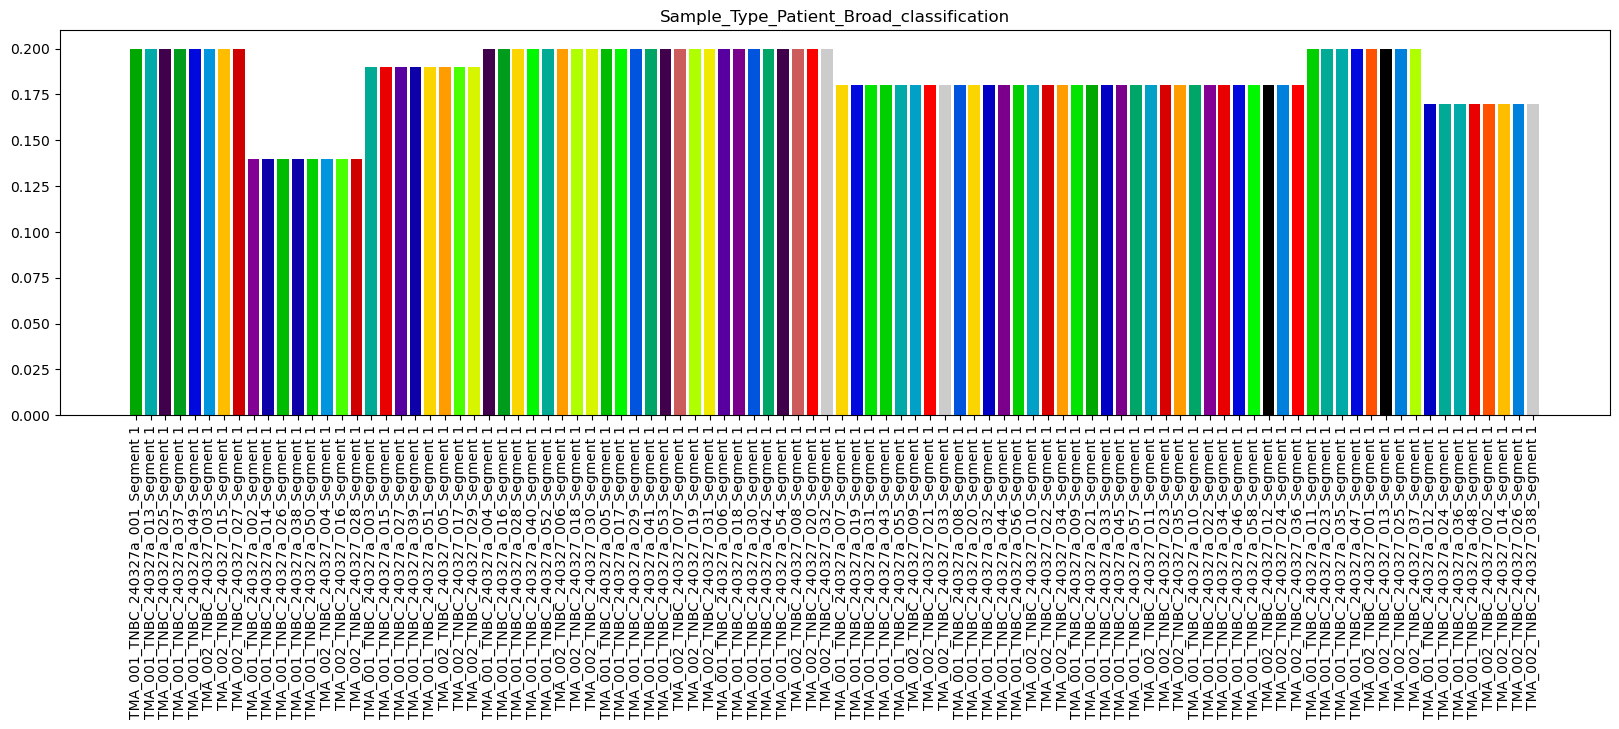


Number of unique combinations: 5
selectedInfo.index
['Sample_Type']


/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein/functions/plotting.py:200: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sampleInfoExternal.columns, rotation='vertical')


<Figure size 4000x1000 with 0 Axes>

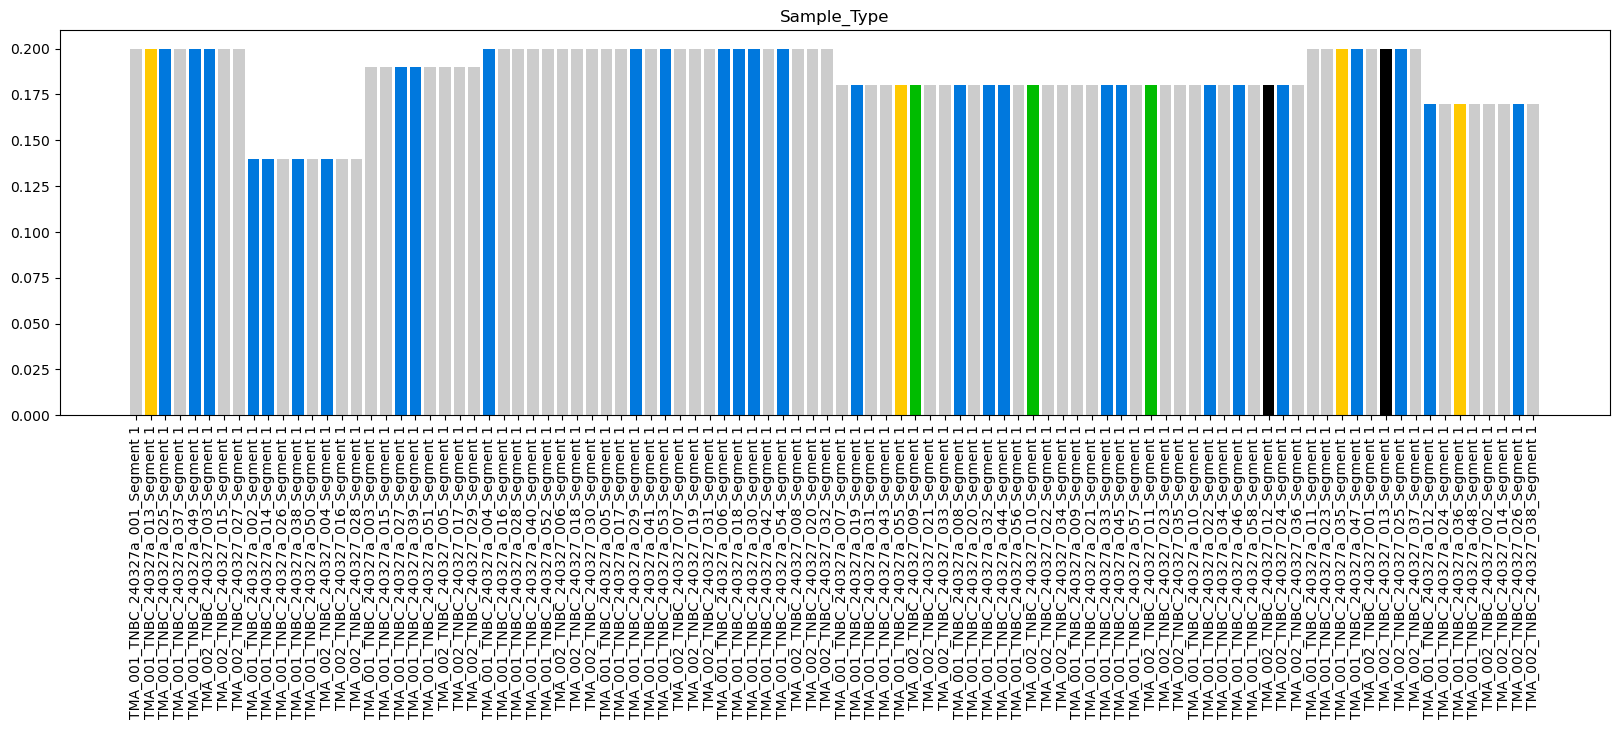


Number of unique combinations: 35
selectedInfo.index
['Patient']


/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein/functions/plotting.py:200: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sampleInfoExternal.columns, rotation='vertical')


<Figure size 4000x1000 with 0 Axes>

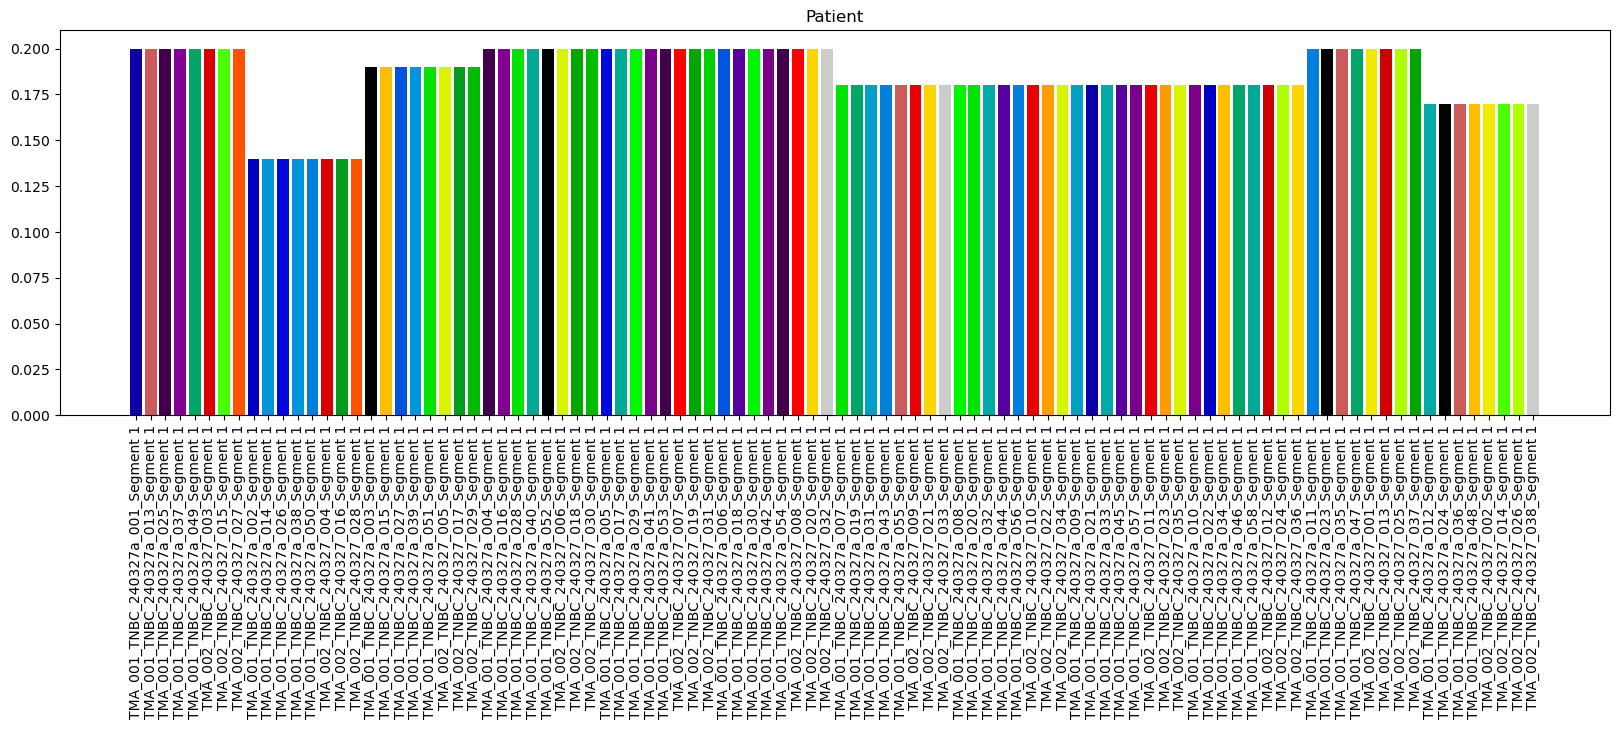


Number of unique combinations: 2
selectedInfo.index
['Broad_classification']


/Users/upton6/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Documents/notebooks/Nanostring/Adams_Bray/DSP_EDA_Protein/functions/plotting.py:200: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sampleInfoExternal.columns, rotation='vertical')


<Figure size 4000x1000 with 0 Axes>

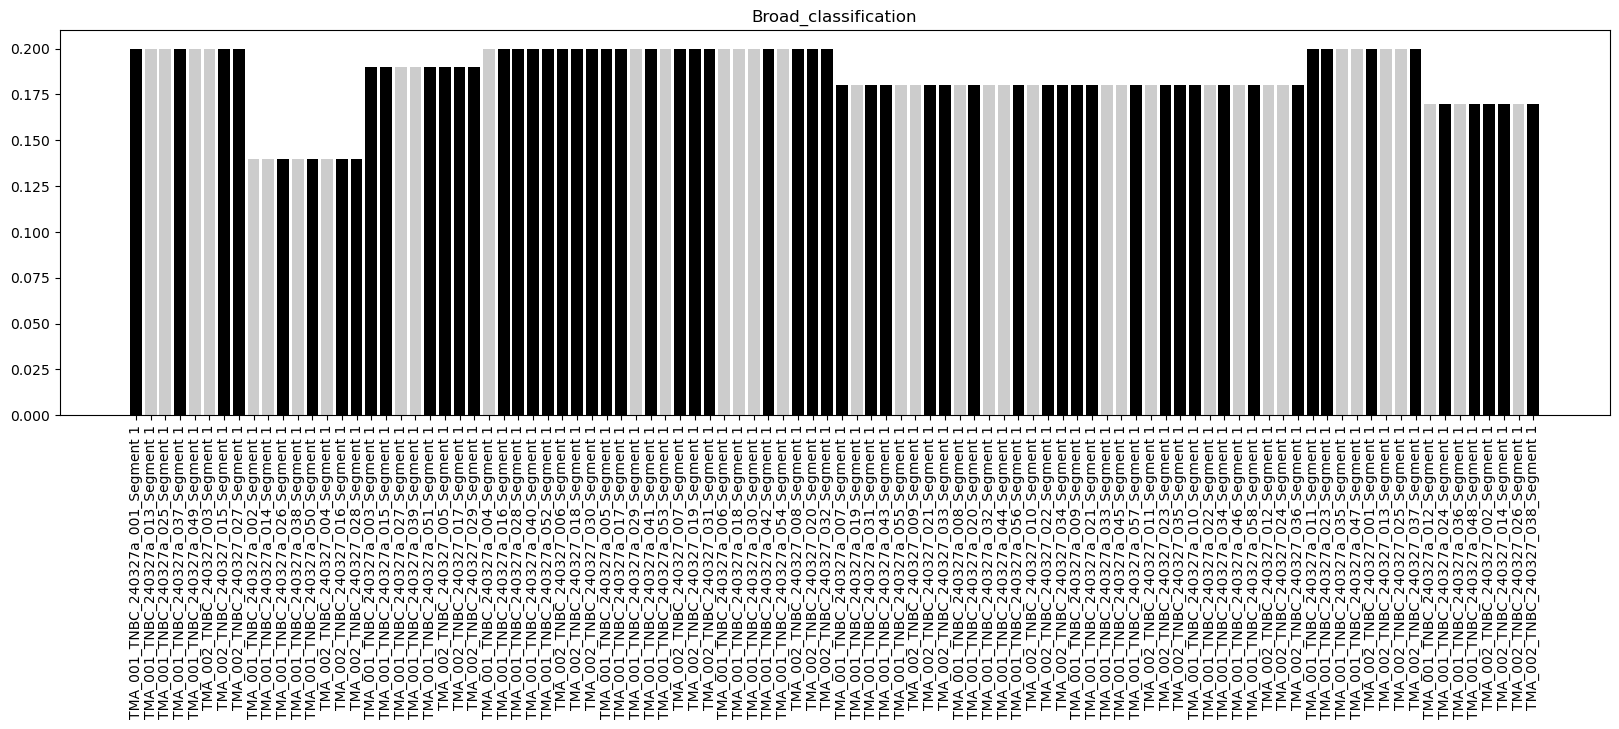

In [48]:
binding_density_plot(sampleInfoExternal, selectedInfo, selected_data)

for s in selected_data:
    binding_density_plot(sampleInfoExternal, selectedInfo, s)
    

In [49]:
# Visualise basic QC statistics

## Relate back to collection order, and plate/well location

## Binding density

# Visualise raw probe values before any normalisation

In [50]:
namedColourList = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']



Number of unique combinations: 2
selectedInfo.index
['Broad_classification']

Number of unique combinations: 5
selectedInfo.index
['Sample_Type']


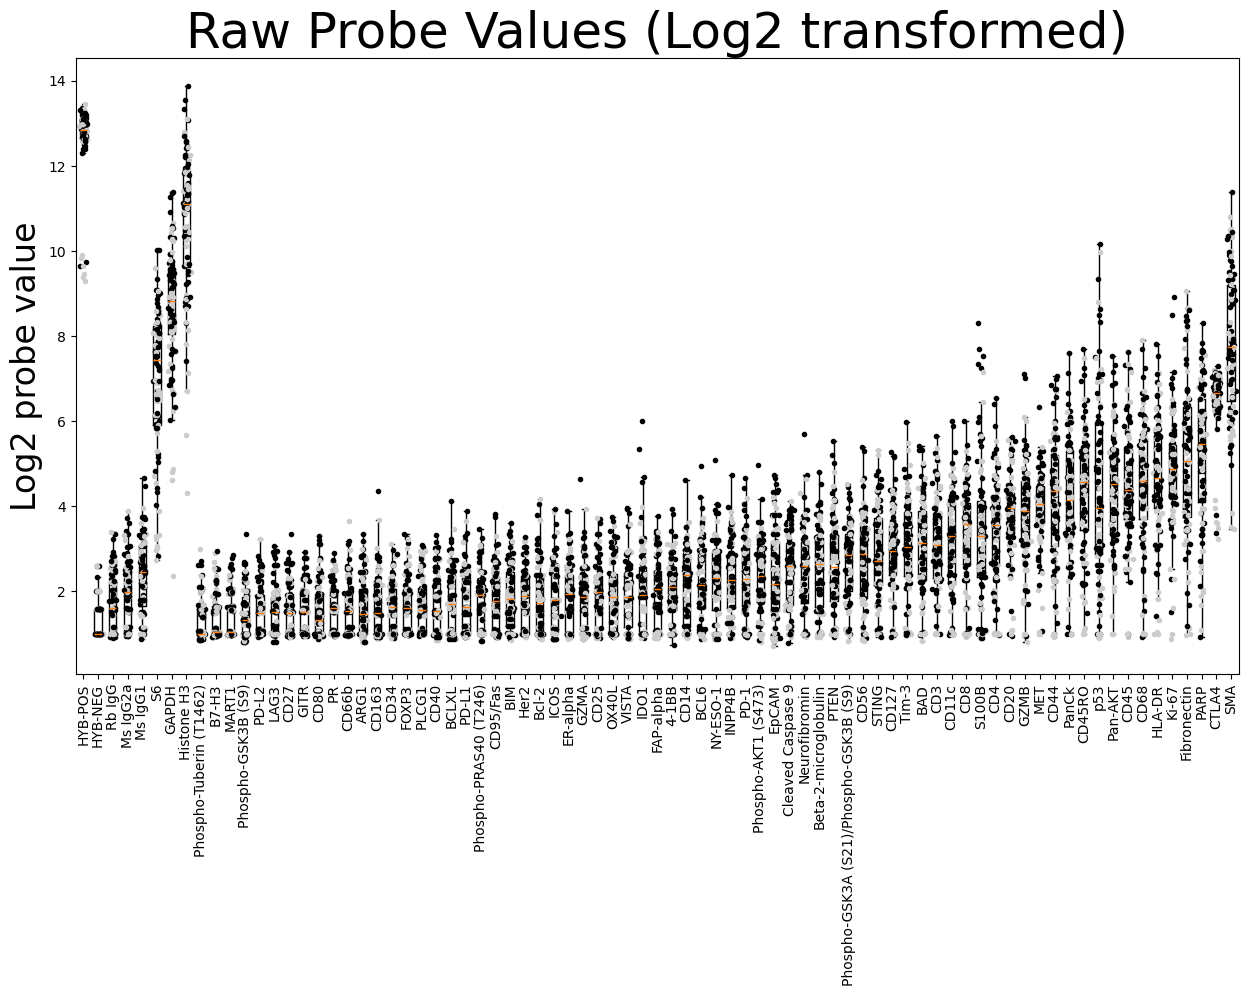

<Figure size 4000x1000 with 0 Axes>

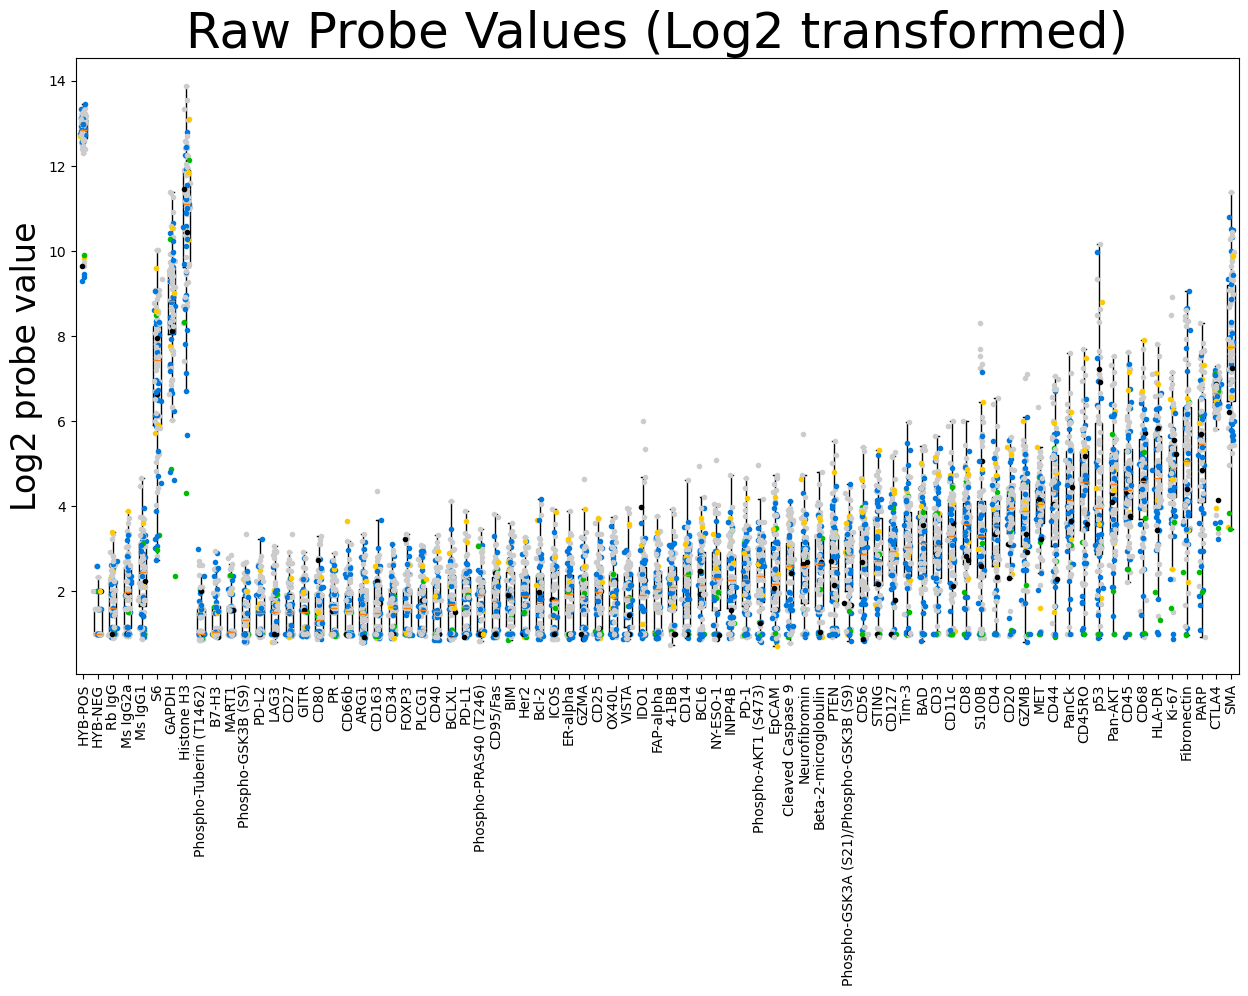

<Figure size 4000x1000 with 0 Axes>

In [51]:
# Sort data by probeclass then mean for nicer visualisation on plots
dataSortedRaw = dataLog1External.sort_values(by = ['probeClass', 'mean'], ascending=[True,True])

probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Broad_classification', 'Raw Probe Values')
# probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Broad_classification', 'Raw Probe Values', exp=True)
probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Sample_Type', 'Raw Probe Values')
# probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Sample_Type', 'Raw Probe Values', exp=True)
# probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Row', 'Raw Probe Values')
# probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Col', 'Raw Probe Values')




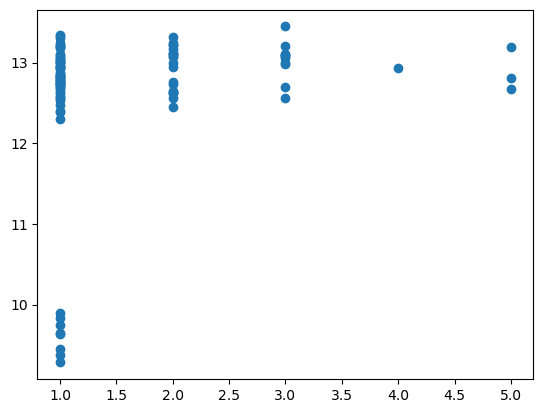

In [52]:
plt.scatter(np.exp2(dataLog1External.drop(labels=['mean','probeClass'], axis=1).loc['HYB-NEG'])-1,
            dataLog1External.drop(labels=['mean','probeClass'], axis=1).loc['HYB-POS'])

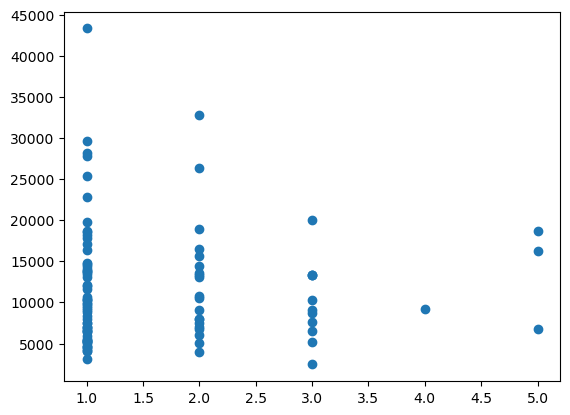

In [53]:
plt.scatter(np.exp2(dataLog1External.drop(labels=['mean','probeClass'], axis=1).loc['HYB-NEG'])-1,
        surfArea.reindex(dataLog1External.drop(labels=['mean','probeClass'],axis=1).columns))

In [54]:
##### QC questions / checks:

# Determine thresholding value for limit of detection for assay

In [55]:
## Find the first local minimum closest to the start of the 'real' values.
## In this development case there is a large peak of near zero values, after this there are two bins with zero values. The second of these bin indexes was chosen for use as the expression threshold value.


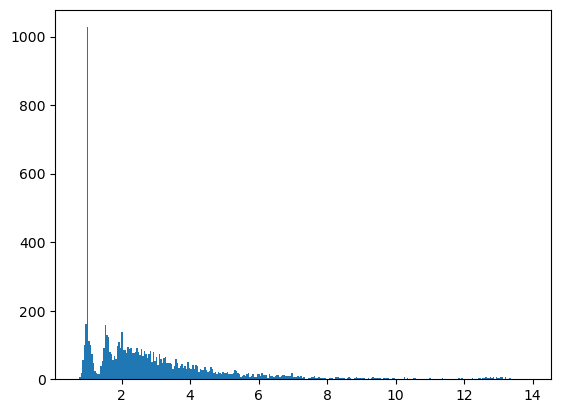

In [56]:
thresholding = threshold_probes(dataLog1External, 300)

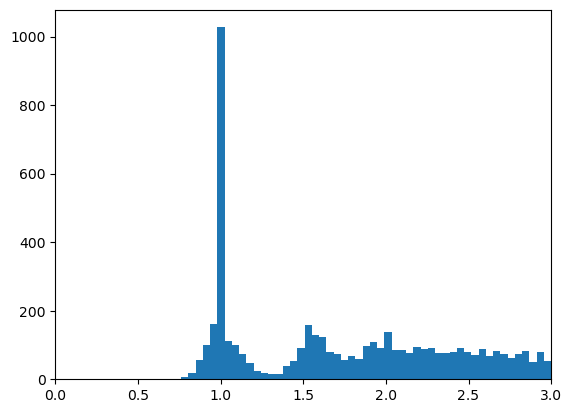

In [57]:
thresholding.zoom_plot(0.5,3)

In [58]:
thresholding.check_threshold(0,20)
thresholding.check_threshold(10,20)

[   2.    8.   17.   55.  100.  162. 1027.  111.  100.   73.   47.   24.
   19.   16.   15.   39.   52.   91.  158.  129.]
[0.71792841 0.76181    0.8056916  0.84957319 0.89345479 0.93733639
 0.98121792 1.02509952 1.06898117 1.11286271 1.15674436 1.2006259
 1.24450743 1.28838909 1.33227062 1.37615228 1.42003381 1.46391547
 1.507797   1.55167866]
[ 47.  24.  19.  16.  15.  39.  52.  91. 158. 129.]
[1.15674436 1.2006259  1.24450743 1.28838909 1.33227062 1.37615228
 1.42003381 1.46391547 1.507797   1.55167866]


In [59]:
#Set index value to use for minimum expression threshold from thresholding 
thresholding.set_threshold_idx(14)

15.0
1.332270622253418


In [60]:
print(thresholding.threshold)
ETFiltered = thresholding.get_filter()

1.332270622253418


# Plot counts of AOIs and probes passing thresholds

In [61]:


# get counts of how many probes are above the expression threshold for each AOI

In [62]:
exportPath = dataPath[:dataPath.rfind('/')]

In [63]:
ETFiltered

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
CD8,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CD4,True,True,True,True,True,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
HYB-NEG,False,False,False,True,True,False,False,False,False,False,...,True,False,True,False,True,False,True,True,False,False
GZMB,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Fibronectin,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PARP,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
p53,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Neurofibromin,True,False,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
GZMA,True,False,True,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,True


thisMin
10
thisMax
78


[]

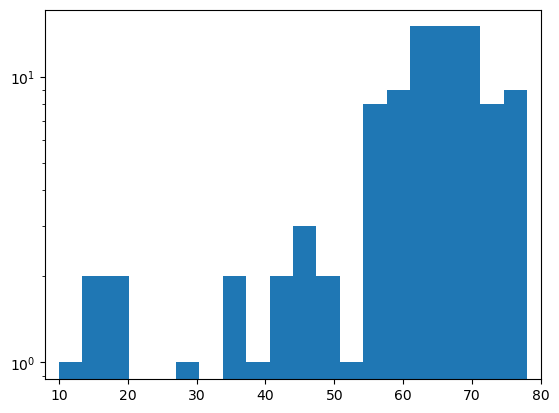

In [64]:
passAOI = ETFiltered.sum()

thisMin = min(passAOI)
thisMax = max(passAOI)
print('thisMin')
print(thisMin)
print('thisMax')
print(thisMax)

plt.hist(passAOI.values, bins=20)
plt.xlim(thisMin-2,thisMax+2)
plt.semilogy()

In [65]:
passAOI.sort_values().index[:5]

Index(['TMA_002_TNBC_240327_004_Segment 1',
       'TMA_001_TNBC_240327a_050_Segment 1',
       'TMA_002_TNBC_240327_016_Segment 1',
       'TMA_001_TNBC_240327a_014_Segment 1',
       'TMA_001_TNBC_240327a_038_Segment 1'],
      dtype='object')

In [66]:
passAOI

TMA_001_TNBC_240327a_001_Segment 1    65
TMA_001_TNBC_240327a_002_Segment 1    37
TMA_001_TNBC_240327a_003_Segment 1    67
TMA_001_TNBC_240327a_004_Segment 1    67
TMA_001_TNBC_240327a_005_Segment 1    76
                                      ..
TMA_002_TNBC_240327_034_Segment 1     67
TMA_002_TNBC_240327_035_Segment 1     73
TMA_002_TNBC_240327_036_Segment 1     62
TMA_002_TNBC_240327_037_Segment 1     67
TMA_002_TNBC_240327_038_Segment 1     56
Length: 96, dtype: int64

In [67]:
failAOIs = passAOI[passAOI < 15]
failAOIs


TMA_001_TNBC_240327a_050_Segment 1    14
TMA_002_TNBC_240327_004_Segment 1     10
dtype: int64

In [68]:
failAOIs = passAOI[passAOI < 22]
failAOIs

TMA_001_TNBC_240327a_014_Segment 1    18
TMA_001_TNBC_240327a_038_Segment 1    20
TMA_001_TNBC_240327a_050_Segment 1    14
TMA_002_TNBC_240327_004_Segment 1     10
TMA_002_TNBC_240327_016_Segment 1     15
dtype: int64

In [69]:
failAOIs = passAOI[passAOI < 50]
failAOIs

TMA_001_TNBC_240327a_002_Segment 1    37
TMA_001_TNBC_240327a_006_Segment 1    40
TMA_001_TNBC_240327a_010_Segment 1    44
TMA_001_TNBC_240327a_014_Segment 1    18
TMA_001_TNBC_240327a_017_Segment 1    48
TMA_001_TNBC_240327a_018_Segment 1    35
TMA_001_TNBC_240327a_026_Segment 1    27
TMA_001_TNBC_240327a_031_Segment 1    45
TMA_001_TNBC_240327a_038_Segment 1    20
TMA_001_TNBC_240327a_050_Segment 1    14
TMA_001_TNBC_240327a_054_Segment 1    47
TMA_001_TNBC_240327a_057_Segment 1    49
TMA_001_TNBC_240327a_058_Segment 1    41
TMA_002_TNBC_240327_004_Segment 1     10
TMA_002_TNBC_240327_016_Segment 1     15
TMA_002_TNBC_240327_028_Segment 1     43
dtype: int64

In [70]:


# writeOutput = True
if writeOutput:
    failAOIs.to_csv(os.path.join(exportPath,'failAOIs.csv'))
# writeOutput= False


In [71]:
# get counts of how many AOIs are above the expression threshold for each probe

thisMin
34
thisMax
96


(29.0, 101.0)

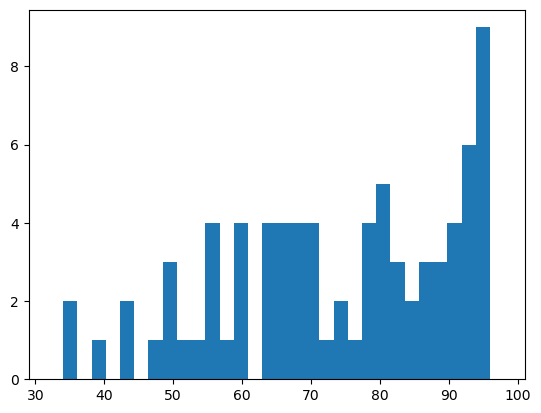

In [72]:
passProbe = ETFiltered.sum(axis=1)

thisMin = min(passProbe)
thisMax = max(passProbe)
print('thisMin')
print(thisMin)
print('thisMax')
print(thisMax)

plt.hist(passProbe.values, bins=30)
plt.xlim(thisMin-5,thisMax+5)
# plt.semilogy()

In [73]:
# ToDo: Ask for a value to use for fail probes cutoff

In [74]:
failProbes = passProbe[passProbe < 48]

failProbes

HYB-NEG                    35
MART1                      44
B7-H3                      40
Phospho-Tuberin (T1462)    34
Phospho-GSK3B (S9)         43
dtype: int64

In [75]:

# writeOutput = True
if writeOutput:
    failProbes.to_csv(os.path.join(exportPath,'FailProbes.csv'))
# writeOutput= False



In [76]:
master_data.set_threshold(master_data,ETFiltered)

In [77]:
master_data.threshold


,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
CD8,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CD4,True,True,True,True,True,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
HYB-NEG,False,False,False,True,True,False,False,False,False,False,...,True,False,True,False,True,False,True,True,False,False
GZMB,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Fibronectin,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PARP,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
p53,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Neurofibromin,True,False,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
GZMA,True,False,True,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,True


In [78]:
# Identify outlier AOIs and probes
# Drop outlier AOIs and probes

In [79]:
# colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in data.drop(labels=['mean','probeClass'], axis=1).columns]


# Plot geometric means of negative controls and housekeeping genes in raw data:

In [80]:
##### It's probably not neccessary to view the following, 
# but lets just have a quick look at how the control values 
# for the raw data is distributed to make sure there are 
# no extreme outliers before ERCC normalisation.

In [81]:
# Calculate Ig control Geometric mean and Housekeeping gene Geometric mean
# Calculating the mean of log transformed data is analagous to calculating the geometric mean of the non-transformed data

HKGeoMean = dataLog1External.drop(labels=['mean','probeClass'], axis=1).loc[masterData.HK].mean()
HKGeoMean = HKGeoMean.sort_values()


IgGeoMean = dataLog1External.drop(labels=['mean','probeClass'], axis=1).reindex(labels=HKGeoMean.index, axis=1).loc[masterData.IgCTLs].mean()

HKIgCtls = masterData.HK.copy()
HKIgCtls.extend(masterData.IgCTLs)

HKIgCtlGeoMeans = dataLog1External.drop(labels=['mean','probeClass'], axis=1).reindex(labels=HKGeoMean.index, axis=1).loc[HKIgCtls].mean()


In [82]:
masterData.HK

['S6', 'Histone H3', 'GAPDH']

In [83]:
HKIgCtls = masterData.HK.copy()

In [84]:
HKIgCtls.extend(masterData.IgCTLs)

In [85]:
HKIgCtls

['S6', 'Histone H3', 'GAPDH', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1']

In [86]:
HKGeoMean

TMA_002_TNBC_240327_004_Segment 1      3.323156
TMA_001_TNBC_240327a_050_Segment 1     4.337737
TMA_002_TNBC_240327_016_Segment 1      4.930038
TMA_001_TNBC_240327a_054_Segment 1     5.380577
TMA_001_TNBC_240327a_010_Segment 1     5.639542
                                        ...    
TMA_002_TNBC_240327_006_Segment 1     10.761428
TMA_002_TNBC_240327_025_Segment 1     11.074425
TMA_002_TNBC_240327_013_Segment 1     11.313071
TMA_002_TNBC_240327_005_Segment 1     11.639752
TMA_002_TNBC_240327_027_Segment 1     11.761311
Length: 96, dtype: float32

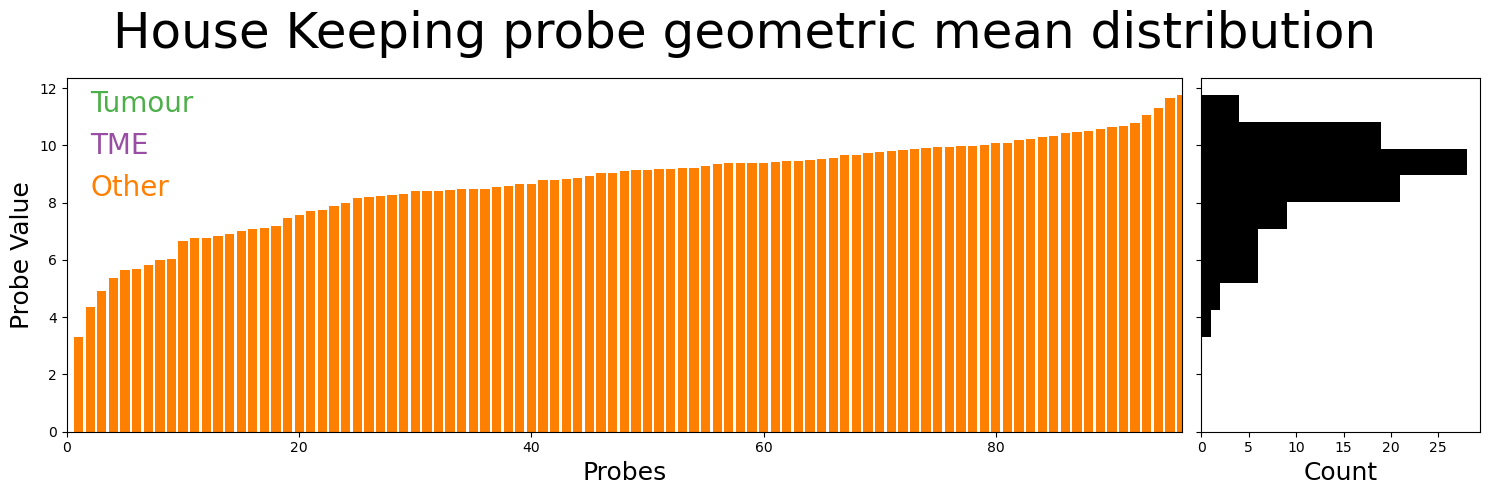

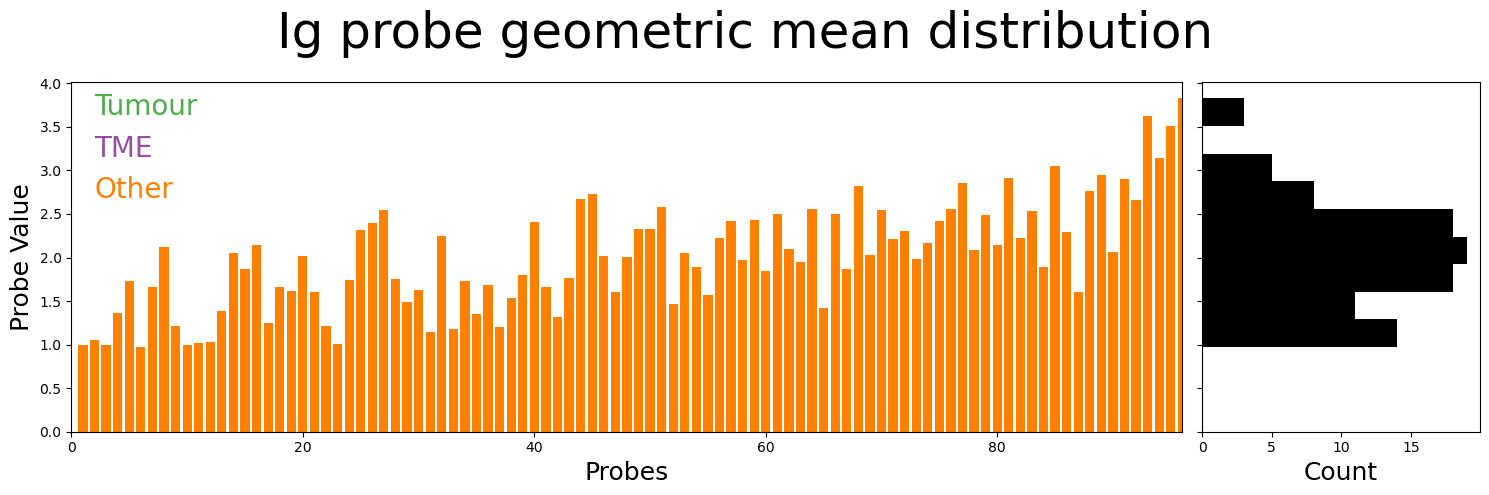

In [87]:
probe_GeoMean_Plots(HKGeoMean, 'House Keeping probe geometric mean distribution')

probe_GeoMean_Plots(IgGeoMean, 'Ig probe geometric mean distribution')

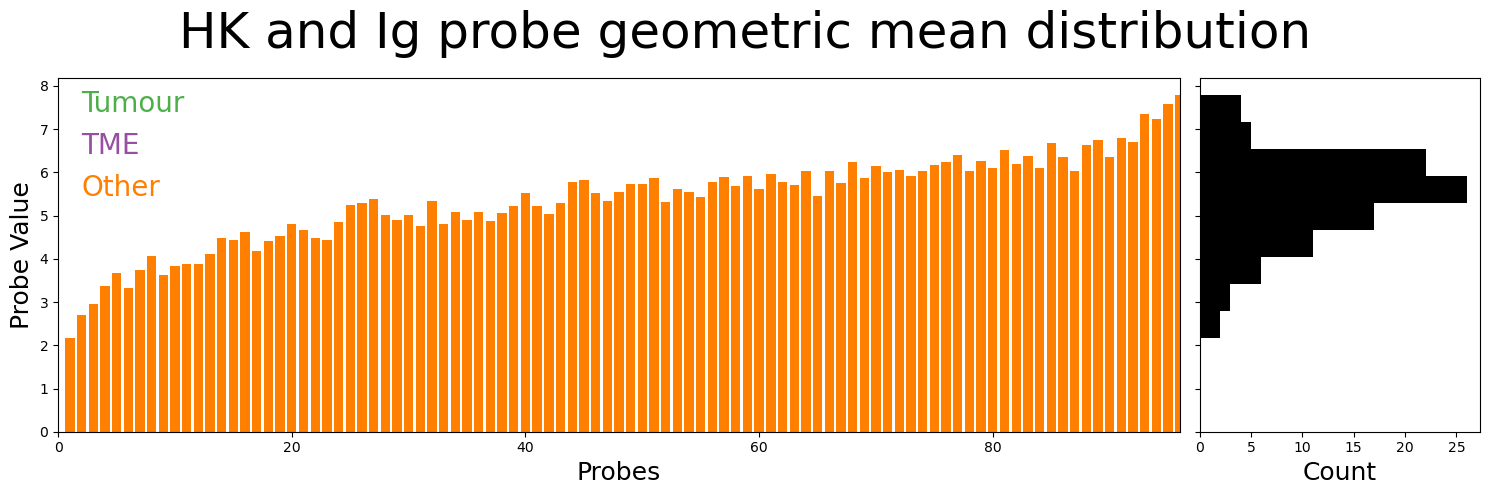

In [88]:
probe_GeoMean_Plots(HKIgCtlGeoMeans, 'HK and Ig probe geometric mean distribution')

In [89]:
HKIgCtls = masterData.HK.extend(masterData.IgCTLs)

In [90]:
masterData.HK

['S6', 'Histone H3', 'GAPDH', 'Rb IgG', 'Ms IgG2a', 'Ms IgG1']

In [91]:
#ToDo: make this a copy of the internal dataFrame. Ensure original data is contained in the master class and cannot be changed accidentally from outside of class.

ERCC_normExternal = masterData.ERCC_norm()

In [92]:
ERCC_normExternal

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
CD8,3.691095,5.953392,3.038877,2.261833,4.596886,0.000000,3.861103,2.105374,1.551720,1.749949,...,2.498653,3.843279,4.560421,4.647788,4.803397,3.663271,3.979925,3.134875,3.540666,2.798991
CD4,3.223479,5.411781,3.425417,3.544136,4.845152,0.000000,3.448067,2.511405,0.000000,1.913696,...,3.094885,3.993704,4.291399,3.730987,4.664054,3.296547,4.501436,3.124744,4.286581,2.788860
HYB-NEG,0.000000,0.000000,0.000000,1.419207,0.899358,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.537388,0.000000,1.218674,0.000000,1.931375,0.000000,1.591508,1.758573,0.000000,0.000000
GZMB,3.128539,5.849338,3.895313,4.279245,5.403035,1.779202,4.794858,3.391471,3.112270,2.939505,...,4.121801,5.141693,4.403234,4.037994,3.860451,4.360636,4.655337,4.619950,4.085330,2.952697
Fibronectin,4.716582,5.003960,3.364076,3.482795,7.464029,0.000000,5.471345,4.980877,3.849859,4.230642,...,8.164611,8.202346,7.346289,5.725007,4.960644,6.246419,5.692436,4.209246,5.961851,4.664428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PARP,7.106187,7.812479,3.566884,6.889795,6.865160,2.012114,5.660779,4.496040,3.610620,2.484983,...,4.915751,5.146283,5.689139,6.383029,5.883092,4.930855,6.249396,4.647429,5.000463,4.426636
p53,6.377961,4.628279,5.677989,8.754944,3.272861,0.000000,6.667540,4.581192,2.657333,1.718446,...,1.862821,3.292147,2.807529,4.612679,3.520352,3.918402,3.010378,3.347428,3.117560,2.841558
Neurofibromin,2.146914,0.000000,1.501747,3.184298,3.628637,0.000000,2.578355,1.557066,1.170651,1.368881,...,2.680527,3.790071,1.797846,2.664104,3.553885,2.334499,2.170679,1.628305,2.934829,2.831209
GZMA,2.338343,0.000000,2.556847,2.675566,2.373308,0.000000,1.495158,2.728802,0.000000,0.000000,...,1.407218,1.770312,1.503541,2.535272,3.853519,2.761242,1.876375,1.643459,0.000000,1.707556


## Load-in deafult QC data for further data QC

In [93]:
# configDict['QCDataPath']

In [94]:
QCmasterData = master_data(os.path.join(configDict['rootDir'],configDict['QCDataPath']))
QCdataExternal, QCdataLog1External, QCsampleInfoExternal = QCmasterData.get_data()

# For the Thomas TMA study there are a number of additional AOIs to be used for data normalisation studies.
# These should be removed before further data analysis and QC.

print(QCmasterData.probeClass)
print(QCmasterData.probeClassDict)
# dataLog1External, sampleInfoExternal = masterData.drop_AOIs('#16_9', writeOrig=True)

# QCnuclei = QCsampleInfoExternal.loc['AOI nuclei count']
# QCsurfArea = QCsampleInfoExternal.loc['AOI surface area']

QCdataLog1External, QCsampleInfoExternal = QCmasterData.add_class_mean(QCmasterData.dataLog1)

sampleInfo.shape
(31, 96)
data.shape
(77, 96)
CD8                     Endogenous
CD4                     Endogenous
GZMB                    Endogenous
Fibronectin             Endogenous
Beta-2-microglobulin    Endogenous
                           ...    
PARP                    Endogenous
p53                     Endogenous
Neurofibromin           Endogenous
GZMA                    Endogenous
Cleaved Caspase 9       Endogenous
Name: ProbeClass, Length: 77, dtype: object
{'Positive': 'A', 'Negative': 'B', 'Control': 'C', 'Endogenous': 'E'}
Positive Control count:	0, []
Nagative Control count:	3, ['Rb IgG', 'Ms IgG2a', 'Ms IgG1']
Ig Control count:	3, ['Rb IgG', 'Ms IgG2a', 'Ms IgG1']
HK Control count:	3, ['S6', 'Histone H3', 'GAPDH']
Endogenous probe count:	71, ['CD8', 'CD4', 'GZMB', 'Fibronectin', 'Beta-2-microglobulin', 'PD-1', 'HLA-DR', 'CD3', 'CD56', 'CD11c', 'CTLA4', 'CD68', 'PanCk', 'SMA', 'CD20', 'PD-L1', 'CD45', 'Ki-67', 'CD25', 'ICOS', 'CD80', 'CD27', 'PD-L2', 'CD127', 'CD40', '

/Users/upton6/anaconda3/envs/nanoeda/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [95]:
QCdataLog1External

,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,TMA_001_TNBC_240327a_010_Segment 1,...,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1,mean,probeClass
CD8,3.904909,5.990084,3.268183,2.507792,4.795800,0.999901,4.050868,2.317210,1.772420,1.915410,...,4.750412,4.840731,4.983261,3.839853,4.152191,3.277339,3.726140,2.979897,3.453269,E
CD4,3.448706,5.375489,3.644103,3.753689,5.041651,1.114675,3.639865,2.716367,0.955178,2.081119,...,4.482697,3.932185,4.843534,3.471079,4.677166,3.266913,4.471308,2.969746,3.572297,E
GZMB,3.356557,5.874300,4.104321,4.478485,5.595400,1.912482,4.981695,3.586721,3.308563,3.115200,...,4.593959,4.235834,4.036819,4.539927,4.831872,4.789044,4.270223,3.133878,3.923587,E
Fibronectin,4.915086,4.887337,3.584268,3.693465,7.649711,1.245541,5.656976,5.168364,4.041089,4.411039,...,7.530820,5.913037,5.140899,6.428885,5.872626,4.373502,6.145820,4.847311,5.207930,E
Beta-2-microglobulin,1.784522,2.998352,2.036062,2.675281,3.090022,1.590295,2.571961,2.072135,2.336294,1.515340,...,2.479245,3.775689,3.857940,2.713393,3.019856,1.872374,2.610153,2.057538,2.647847,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PARP,7.292614,7.958104,3.782326,7.075950,7.051927,2.153015,5.846162,4.685075,3.803219,2.657727,...,5.875668,6.569436,6.064950,5.111568,6.430696,4.816799,5.184761,4.609384,5.371168,E
p53,6.566265,4.408247,5.868997,8.939230,3.494547,1.093404,6.852034,4.769915,2.858298,1.883502,...,3.012554,4.805853,3.694780,4.096130,3.171645,3.495609,3.303665,3.022544,4.487322,E
Neurofibromin,2.416980,3.150924,1.814250,3.401125,3.842078,1.093404,2.776891,1.781768,1.402380,1.528802,...,2.024260,2.884338,3.728525,2.500342,2.314018,1.691642,3.121268,3.012175,2.626450,E
GZMA,2.597939,3.410612,2.803905,2.906223,2.627190,1.254436,1.710207,2.930796,1.081516,1.189474,...,1.739470,2.758881,4.029853,2.931662,2.010432,1.708107,0.903001,1.885374,2.031992,E


In [96]:
# Sort data by probeclass then mean for nicer visualisation on plots
QCdataSortedERCC = QCdataLog1External.sort_values(by = ['probeClass', 'mean'], ascending=[True,True])

# ToDo: repeat the colour map after data sorting


Number of unique combinations: 2
selectedInfo.index
['Broad_classification']


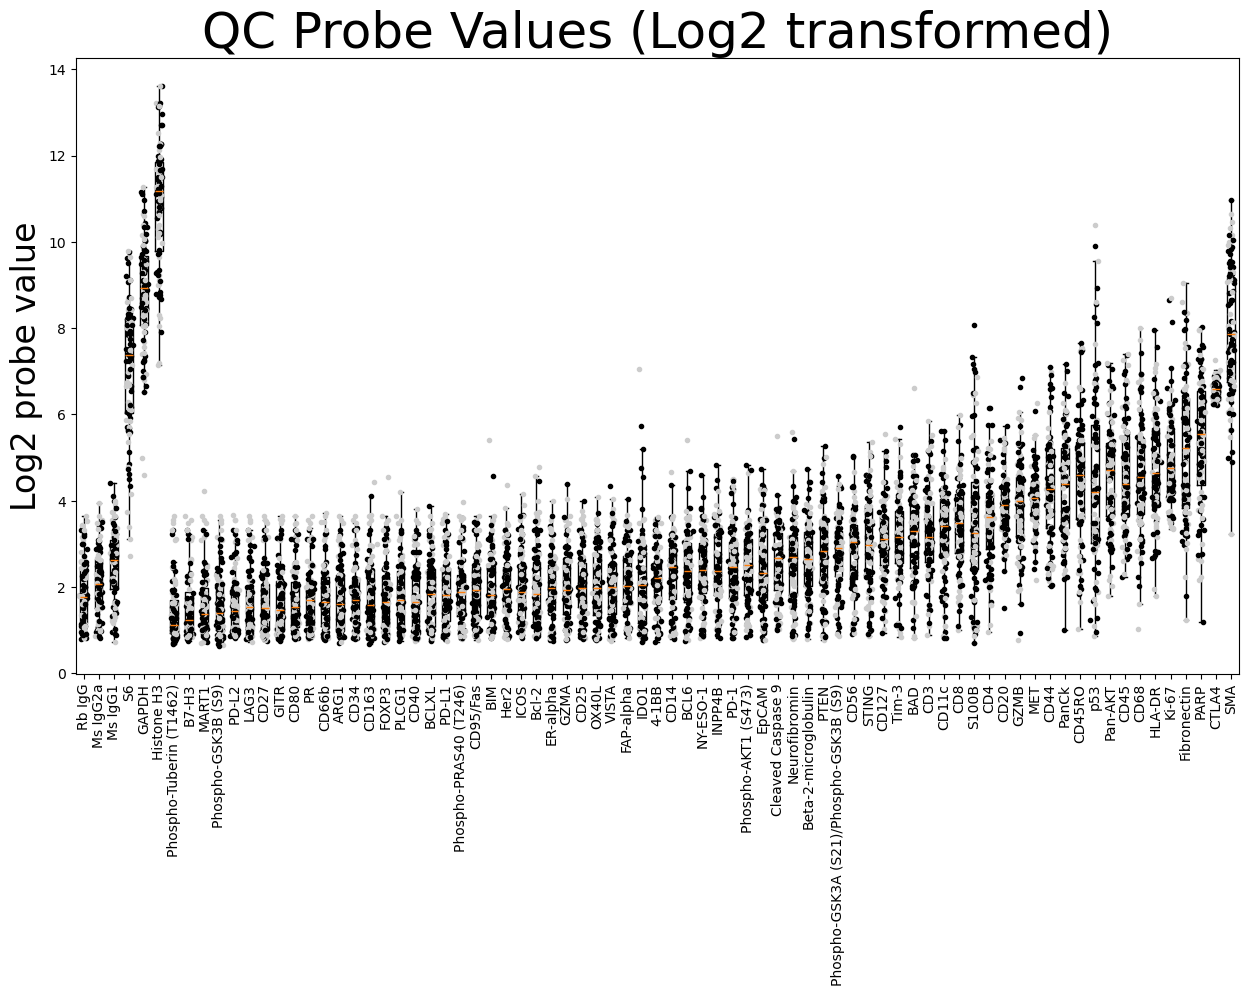

<Figure size 4000x1000 with 0 Axes>

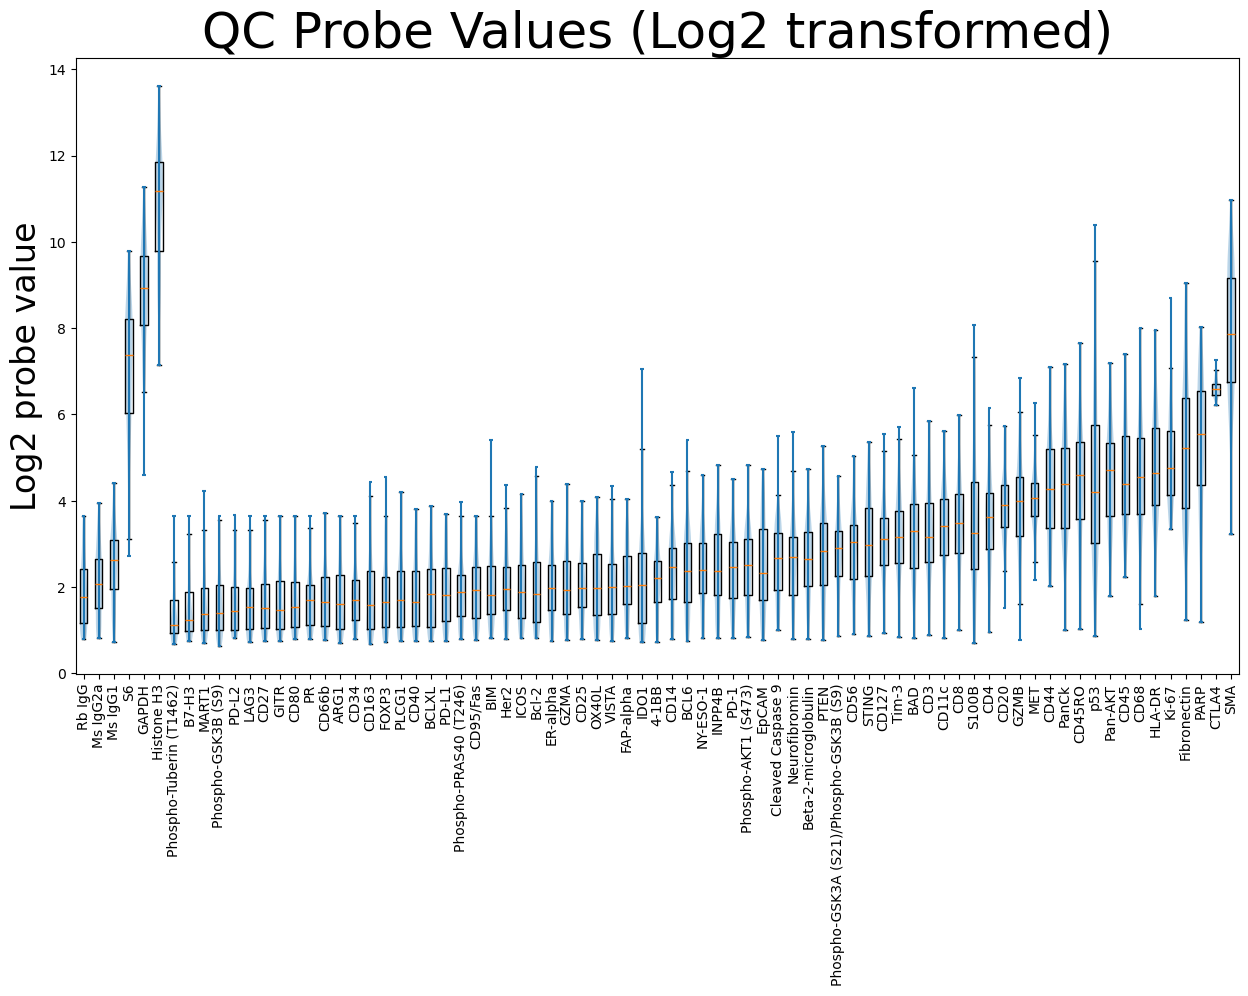

In [97]:

# probePlot = draw_probe_plot_2(dataLog1External, dataSortedRaw, namedColourList, sampleInfoExternal, selectedInfo, 'Broad_classification', 'Raw Probe Values')
probePlot = draw_probe_plot_2(QCdataLog1External, QCdataSortedERCC, namedColourList, sampleInfoExternal, selectedInfo, 'Broad_classification', 'QC Probe Values')
probePlot = draw_probe_plot_2(QCdataLog1External, QCdataSortedERCC, namedColourList, sampleInfoExternal, selectedInfo, 'Broad_classification', 'QC Probe Values', violin=True)
# probePlot = draw_probe_plot_2(QCdataLog1External, QCdataSortedERCC, namedColourList, sampleInfoExternal, selectedInfo, 'Col', 'QC Probe Values')



# probePlot = draw_probe_plot(QCdataLog1External, QCdataSortedERCC, namedColourList, 'QC Probe Values')
# probePlot = draw_probe_plot(QCdataLog1External, QCdataSortedERCC, namedColourList, 'QC Probe Values', violin=True)

# probePlot = draw_probe_plot(QCdataLog1External, QCdataSortedERCC, namedColourList, 'QC Probe Values', exp=True)

### ToDo: Collate figures into a pdf

In [98]:
QCSortedIndex = sorted(masterData.probeClass.index, key=lambda x: masterData.probeClassDict[masterData.probeClass[x]])

QCSortedIndex

['HYB-POS',
 'HYB-NEG',
 'Rb IgG',
 'Ms IgG2a',
 'Ms IgG1',
 'S6',
 'Histone H3',
 'GAPDH',
 'CD8',
 'CD4',
 'GZMB',
 'Fibronectin',
 'Beta-2-microglobulin',
 'PD-1',
 'HLA-DR',
 'CD3',
 'CD56',
 'CD11c',
 'CTLA4',
 'CD68',
 'PanCk',
 'SMA',
 'CD20',
 'PD-L1',
 'CD45',
 'Ki-67',
 'CD25',
 'ICOS',
 'CD80',
 'CD27',
 'PD-L2',
 'CD127',
 'CD40',
 'CD44',
 'CD34',
 'CD163',
 'CD45RO',
 'FOXP3',
 'CD14',
 'FAP-alpha',
 'CD66b',
 'PTEN',
 'EpCAM',
 'Her2',
 'S100B',
 'Bcl-2',
 'NY-ESO-1',
 'PR',
 'MART1',
 'ER-alpha',
 'IDO1',
 'Tim-3',
 '4-1BB',
 'STING',
 'GITR',
 'OX40L',
 'VISTA',
 'B7-H3',
 'LAG3',
 'ARG1',
 'MET',
 'INPP4B',
 'PLCG1',
 'Phospho-GSK3A (S21)/Phospho-GSK3B (S9)',
 'Phospho-Tuberin (T1462)',
 'Phospho-AKT1 (S473)',
 'Pan-AKT',
 'Phospho-PRAS40 (T246)',
 'Phospho-GSK3B (S9)',
 'BCLXL',
 'BIM',
 'BCL6',
 'CD95/Fas',
 'BAD',
 'PARP',
 'p53',
 'Neurofibromin',
 'GZMA',
 'Cleaved Caspase 9']

In [99]:
QCSortedProbes = masterData.probeClass[QCSortedIndex]

In [100]:
QCSortedProbes.name = "Code.Class"

In [101]:
QCSortedProbes

HYB-POS                Positive
HYB-NEG                Negative
Rb IgG                 Negative
Ms IgG2a               Negative
Ms IgG1                Negative
                        ...    
PARP                 Endogenous
p53                  Endogenous
Neurofibromin        Endogenous
GZMA                 Endogenous
Cleaved Caspase 9    Endogenous
Name: Code.Class, Length: 79, dtype: object

In [102]:
QCExport = QCmasterData.dataOrig.copy()

In [103]:
posNeg = masterData.dataOrig.loc[['HYB-NEG','HYB-POS'],]

In [104]:
QCExport = pd.concat([QCExport,posNeg])
QCExport = QCExport.loc[QCSortedIndex,]
QCExport = pd.concat([QCSortedProbes, QCExport], axis = 1)
QCExport.index.name = 'Name'
QCExport

,Code.Class,TMA_001_TNBC_240327a_001_Segment 1,TMA_001_TNBC_240327a_002_Segment 1,TMA_001_TNBC_240327a_003_Segment 1,TMA_001_TNBC_240327a_004_Segment 1,TMA_001_TNBC_240327a_005_Segment 1,TMA_001_TNBC_240327a_006_Segment 1,TMA_001_TNBC_240327a_007_Segment 1,TMA_001_TNBC_240327a_008_Segment 1,TMA_001_TNBC_240327a_009_Segment 1,...,TMA_002_TNBC_240327_029_Segment 1,TMA_002_TNBC_240327_030_Segment 1,TMA_002_TNBC_240327_031_Segment 1,TMA_002_TNBC_240327_032_Segment 1,TMA_002_TNBC_240327_033_Segment 1,TMA_002_TNBC_240327_034_Segment 1,TMA_002_TNBC_240327_035_Segment 1,TMA_002_TNBC_240327_036_Segment 1,TMA_002_TNBC_240327_037_Segment 1,TMA_002_TNBC_240327_038_Segment 1
Name,,,,,,,,,,,,,,,,,,,,,
HYB-POS,Positive,10414.932617,910.651123,10264.009766,9453.121094,10165.526367,6331.071777,7722.628418,7945.175293,7859.481934,...,8709.541016,8411.217773,8146.964844,8809.258789,6627.926758,6706.870117,6291.377930,5603.323730,7301.854492,7072.502930
HYB-NEG,Negative,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000
Rb IgG,Negative,1.655101,7.882243,1.679438,0.911750,2.543562,1.361363,2.232111,2.169590,1.096622,...,4.597925,5.554502,2.457714,1.515293,5.034986,4.975721,6.365190,4.764532,2.742168,2.831092
Ms IgG2a,Negative,6.329659,8.043448,4.281821,9.298231,5.764404,4.627827,0.948482,6.453404,1.863933,...,2.510931,2.599987,5.368640,4.137514,3.299533,2.173797,2.317358,1.300958,0.983034,3.092124
Ms IgG1,Negative,6.797715,7.882243,5.016487,6.808501,6.331358,7.116190,8.334156,3.240285,5.732326,...,1.370031,4.255867,5.858546,3.386307,3.600626,0.889561,5.689854,7.453290,4.085381,3.374291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PARP,Endogenous,155.781799,247.672607,12.759209,133.919037,131.691040,3.447564,56.526802,24.724562,12.959924,...,33.456989,39.367744,57.715427,93.972343,65.947098,33.572868,85.264580,27.183887,35.372101,23.409723
p53,Endogenous,93.763824,20.233168,57.444550,489.881195,10.271023,1.133769,114.522820,26.282707,6.251594,...,3.306625,10.271708,7.069919,26.970863,11.949102,16.102438,8.010738,10.279325,8.874208,7.125989
Neurofibromin,Endogenous,4.340520,7.882243,2.516768,9.564297,13.341039,1.133769,5.853736,2.438473,1.643374,...,6.456760,14.857253,3.067832,6.383671,12.255557,4.658194,3.972662,2.230241,7.701525,7.067800


In [105]:
normDir = os.path.join(configDict['rootDir'], 'DSP_Protein_Data', 'Normalisation')
normDir = os.path.join(configDict['rootDir'], 'Normalisation')

# check if folder exists and create directory if not
if not (os.path.isdir(normDir)):
    os.mkdir(normDir)


In [106]:
# ToDo: Ask for project name interactively

project = configDict['projectName']
qcCSV = 'QC_' + project + '_RUV.csv'

# writeOutput = True
if writeOutput:
    QCExport.to_csv(os.path.join(normDir, qcCSV))
# writeOutput= False

In [107]:
normDir

'/Users/upton6/Documents/Nanostring/projects/Adams/Normalisation'

# Run NSNorm in R

In [108]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# Rscript Documents/notebooks/Nanostring/Larisa_Spheroids/DSP_EDA_Protein/NSNorm.R -d /Users/upton6/Documents/Nanostring/projects/Larisa/2312_Run/DSP_Protein_Data/Normalisation -f QC_Larisa_Spheroids_RUV.csv

cmd = 'Rscript NSNorm.R -d ' + normDir + ' -f ' + qcCSV
print(cmd)
os.system(cmd)